## Importing required libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import product
fig_size = plt.rcParams['figure.figsize']

%matplotlib inline

In [2]:
@np.vectorize
def normal_pdf(x, mu, sigma):
    part1 = sigma * np.sqrt(2 * np.pi)
    part2 = (x - mu) / sigma
    return np.exp(-(part2 ** 2) / 2) / part1


def hellinger(mu1, mu2, sigma1, sigma2):
    part1_1 = (mu1 - mu2) ** 2
    part1_2 = (sigma1 ** 2) + (sigma2 ** 2)
    part1 = np.exp(part1_1 / (4 * part1_2))
    part2 = np.sqrt(2 * sigma1 * sigma2 / part1_2)
    return 1 - (part1 * part2)

# Discrete Distributions

## Binomial Distribution
### Parameters:
The Binomial distribution has two parameters $n$ and $p$.

### PMF and other statistics:
1. PMF: $p_X(k;n, p) = \binom{n}{k}p^{k}(1 - p)^{n - k}; k \in \{0, 1, 2, 3, ..., n\}$
2. Mean: $np$
3. Variance: $np(1 - p)$

*This distribution gives the probability of k successes out of a total of n trials.*

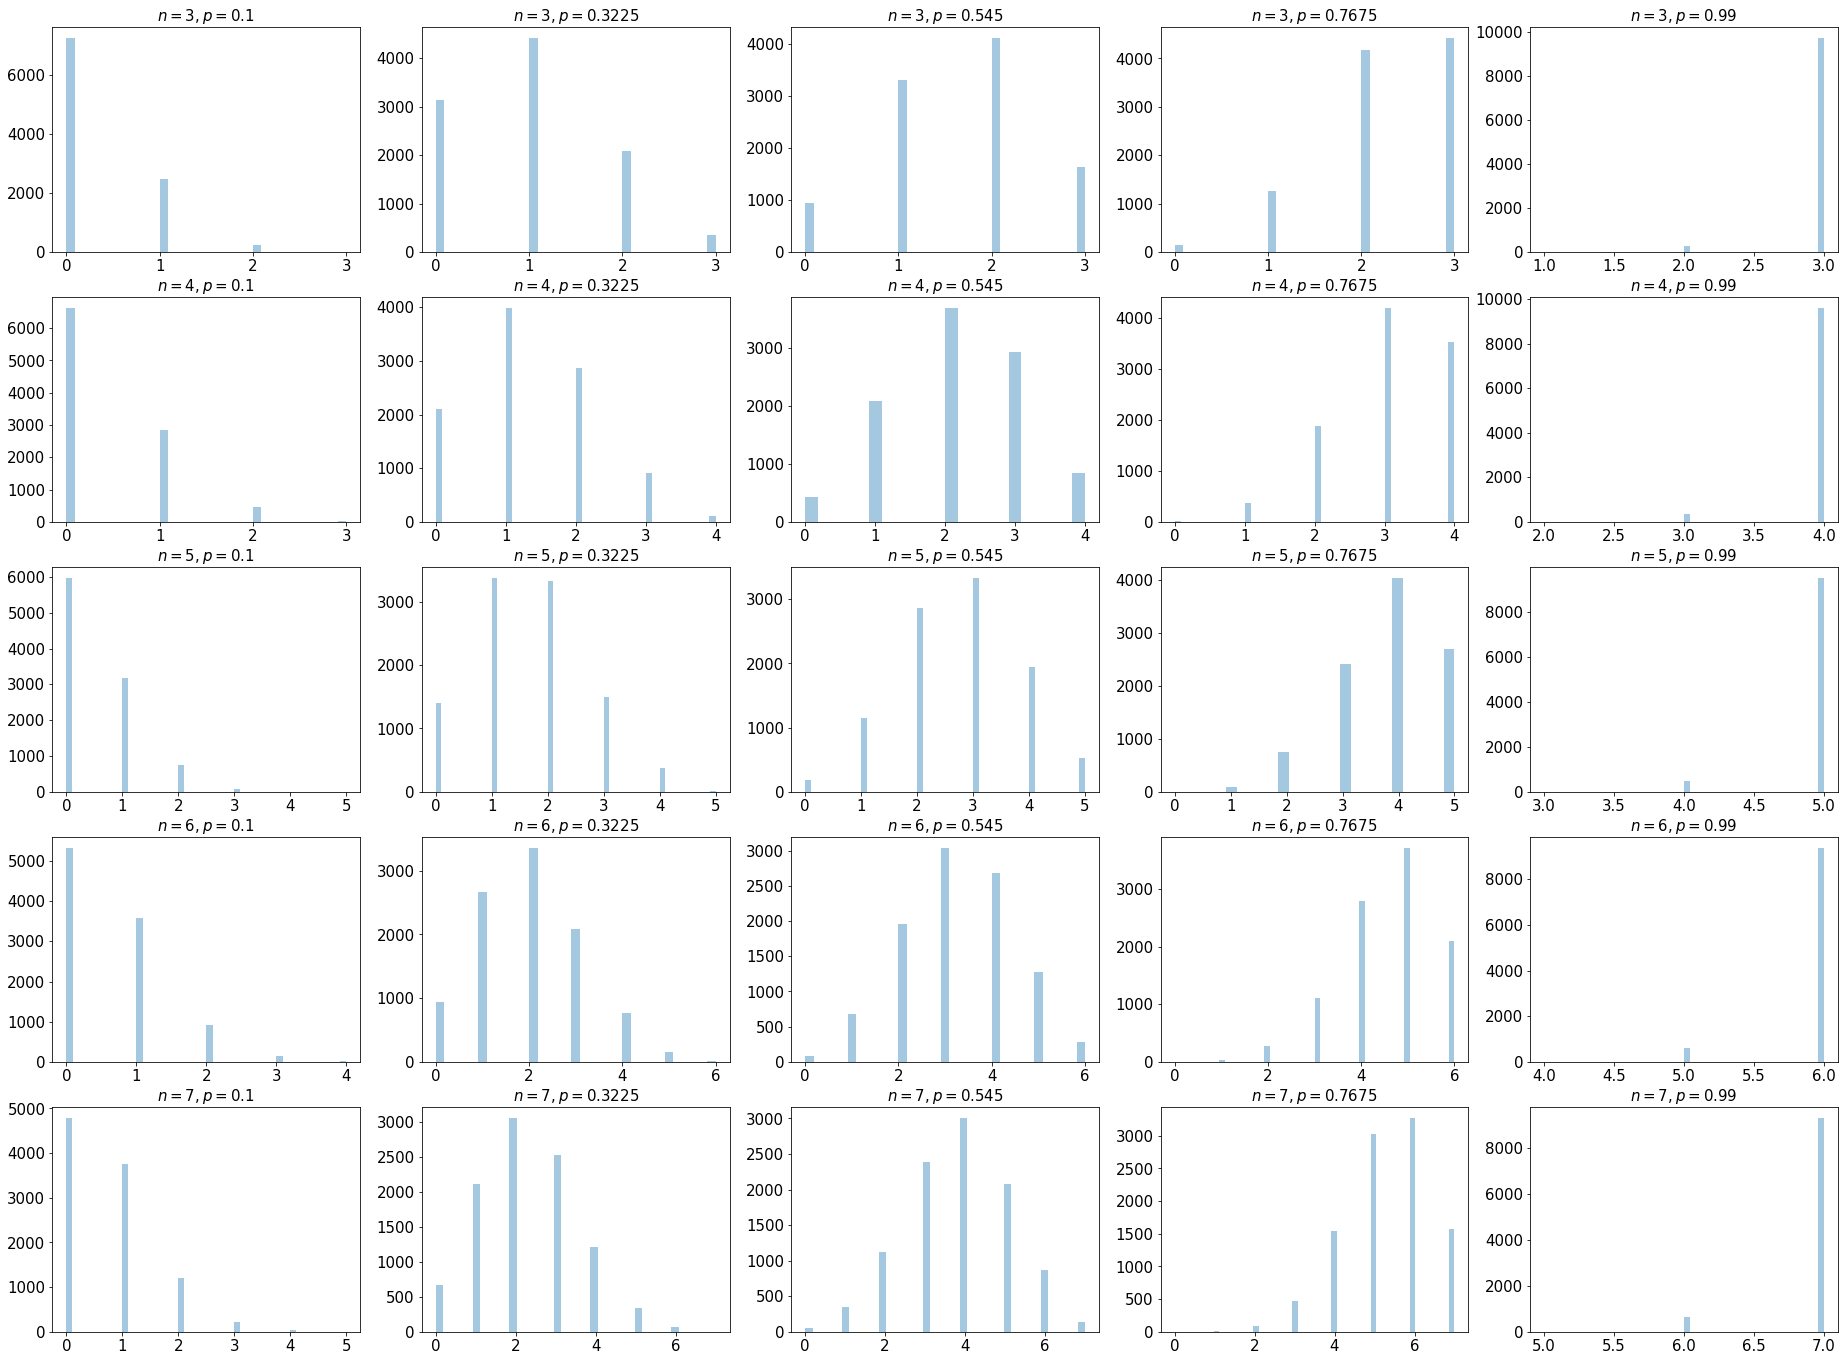

In [3]:
## Part 1: Experimenting with parameters

ns = [i + 3 for i in range(5)]
ps = np.linspace(0.1, 1 - 0.01, num=5)

nrows = 5
ncols = 5
fig, ax = plt.subplots(nrows, ncols, figsize=(fig_size[0] * ncols, fig_size[1] * nrows))
ax = np.reshape(ax, (nrows, ncols))

for i, j in product(range(nrows), range(ncols)):
    _ = sns.distplot(np.random.binomial(n=ns[i], p=ps[j], size=int(1e4)), ax=ax[i, j], kde=False)
    _ = ax[i, j].set_title(f"$n={ns[i]}, p={ps[j]}$", fontsize=15)
    _ = ax[i, j].tick_params(labelsize=15)

plt.savefig("binomial.png")

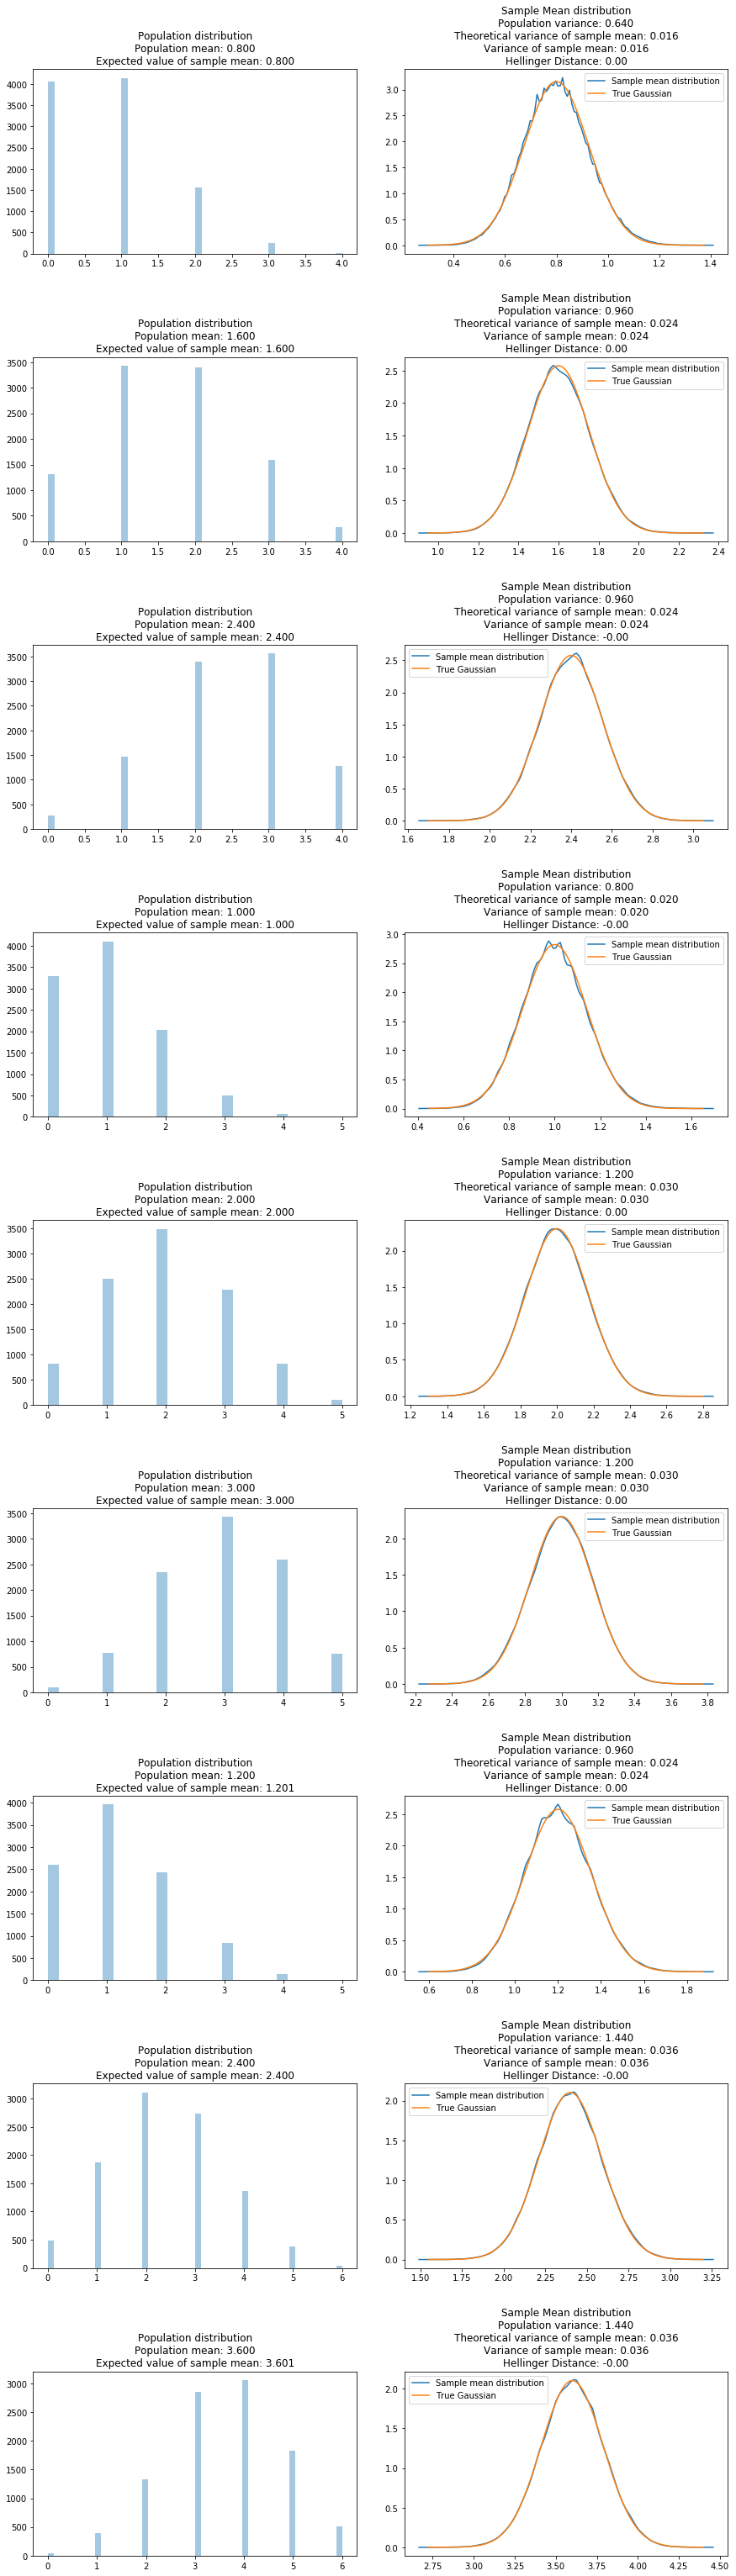

In [4]:
## Part 2: Central Limit Theorem

nrows = 9
ncols = 2
fig, ax = plt.subplots(nrows, ncols, figsize=(fig_size[0] * ncols, fig_size[1] * nrows))

count = 0
for n in [4, 5, 6]:
    for p in [0.2, 0.4, 0.6]:
#         n = 5
#         p = 0.2
        pop_mean = n * p
        pop_var = n * p * (1 - p)
        SAMPLE_SIZE = 40
        RUNS = int(1e5)

        sample_means = [np.mean(np.random.binomial(n=n, p=p, size=SAMPLE_SIZE)) for _ in range(RUNS)]

        expect_sample_mean = np.mean(sample_means)
        theo_var_sample_mean = pop_var / SAMPLE_SIZE
        var_sample_mean = np.var(sample_means)

        hellinger_distance = hellinger(pop_mean, expect_sample_mean, np.sqrt(theo_var_sample_mean), np.sqrt(var_sample_mean))

        _ = sns.distplot(np.random.binomial(n=n, p=p, size=int(1e4)), ax=ax[count][0], kde=False)
        _ = ax[count][0].set(title=f"Population distribution\nPopulation mean: {pop_mean:.3f}\nExpected value of sample mean: {expect_sample_mean:.3f}")
        
        _ = sns.kdeplot(sample_means, ax=ax[count][1], label="Sample mean distribution")
        inputs = np.linspace(min(sample_means), max(sample_means), num=1000)
        _ = sns.lineplot(inputs, normal_pdf(inputs, pop_mean, np.sqrt(theo_var_sample_mean)), ax=ax[count][1], label="True Gaussian")
        _ = ax[count][1].set(title=f"Sample Mean distribution\nPopulation variance: {pop_var:.3f}\nTheoretical variance of sample mean: {theo_var_sample_mean:.3f}\nVariance of sample mean: {var_sample_mean:.3f}\nHellinger Distance: {hellinger_distance:.2f}")
        _ = ax[count][1].legend()
        
        count += 1
        
fig.tight_layout(pad=3.0)
plt.savefig("binomial_clt.png")

## Geometric Distribution
### Parameters:
The Geometric distribution has one parameter $p$.

### PMF and other statistics:
1. PMF: $p_X(k;p) = (1 - p)^{k - 1}p; k \in \{1, 2, 3, ...\}$
2. Mean: $\frac{1}{p}$
3. Variance: $\frac{1 - p}{p^2}$

*This distribution gives the probability of conducting k trials to achieve the first success.*

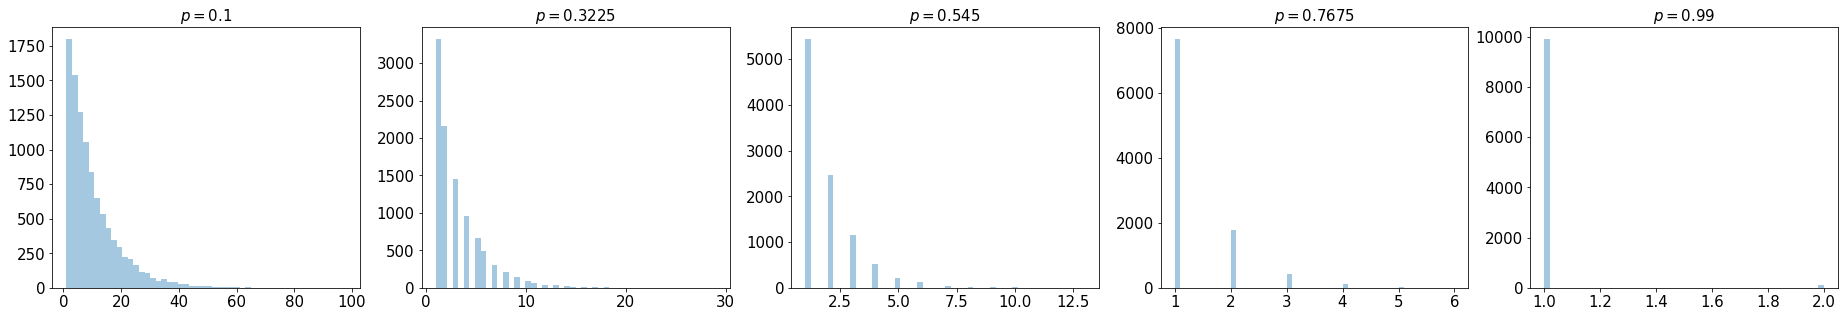

In [5]:
## Part 1: Experimenting with parameters

ps = np.linspace(0.1, 1 - 0.01, num=5)

nrows = 1
ncols = 5
fig, ax = plt.subplots(nrows, ncols, figsize=(fig_size[0] * ncols, fig_size[1] * nrows))
ax = np.reshape(ax, (nrows, ncols))

for i, j in product(range(nrows), range(ncols)):
    _ = sns.distplot(np.random.geometric(p=ps[j], size=int(1e4)), ax=ax[i, j], kde=False)
    _ = ax[i, j].set_title(f"$p={ps[j]}$", fontsize=15)
    _ = ax[i, j].tick_params(labelsize=15)

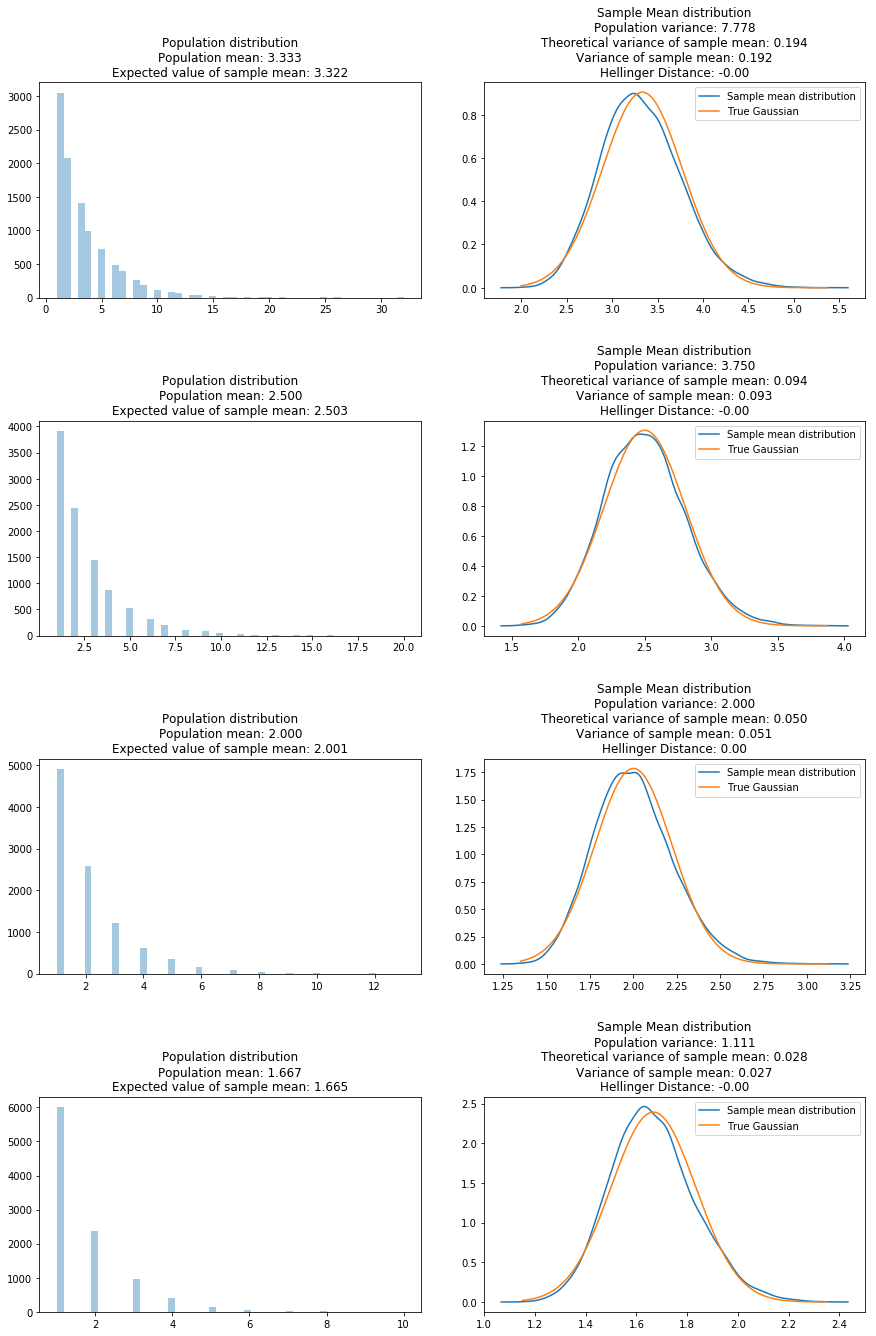

In [6]:
## Part 2: Central Limit Theorem

nrows = 4
ncols = 2
fig, ax = plt.subplots(nrows, ncols, figsize=(fig_size[0] * ncols, fig_size[1] * nrows))


for count, p in enumerate([0.3, 0.4, 0.5, 0.6]):
    # p = 0.3
    pop_mean = 1 / p
    pop_var = (1 - p) / (p ** 2)
    SAMPLE_SIZE = 40
    RUNS = int(1e4)

    sample_means = [np.mean(np.random.geometric(p=p, size=SAMPLE_SIZE)) for _ in range(RUNS)]

    expect_sample_mean = np.mean(sample_means)
    theo_var_sample_mean = pop_var / SAMPLE_SIZE
    var_sample_mean = np.var(sample_means)

    hellinger_distance = hellinger(pop_mean, expect_sample_mean, np.sqrt(theo_var_sample_mean), np.sqrt(var_sample_mean))

    _ = sns.distplot(np.random.geometric(p=p, size=int(1e4)), ax=ax[count][0], kde=False)
    _ = ax[count][0].set(title=f"Population distribution\nPopulation mean: {pop_mean:.3f}\nExpected value of sample mean: {expect_sample_mean:.3f}")

    _ = sns.kdeplot(sample_means, ax=ax[count][1], label="Sample mean distribution")
    inputs = np.linspace(min(sample_means), max(sample_means), num=1000)
    _ = sns.lineplot(inputs, normal_pdf(inputs, pop_mean, np.sqrt(theo_var_sample_mean)), ax=ax[count][1], label="True Gaussian")
    _ = ax[count][1].set(title=f"Sample Mean distribution\nPopulation variance: {pop_var:.3f}\nTheoretical variance of sample mean: {theo_var_sample_mean:.3f}\nVariance of sample mean: {var_sample_mean:.3f}\nHellinger Distance: {hellinger_distance:.2f}")
    _ = ax[count][1].legend()
    
fig.tight_layout(pad=3.0)

## Poisson Distribution
### Parameters:
The Poisson distribution has one parameter $\lambda$.

### PMF and other statistics:
1. PMF: $p_X(k;\lambda) = \frac{\lambda^ke^{-\lambda}}{k!}$
2. Mean: $\lambda$
3. Variance: $\lambda$

*This distribution gives the probability of k events occuring at a time given that on average $\lambda$ events occur.*

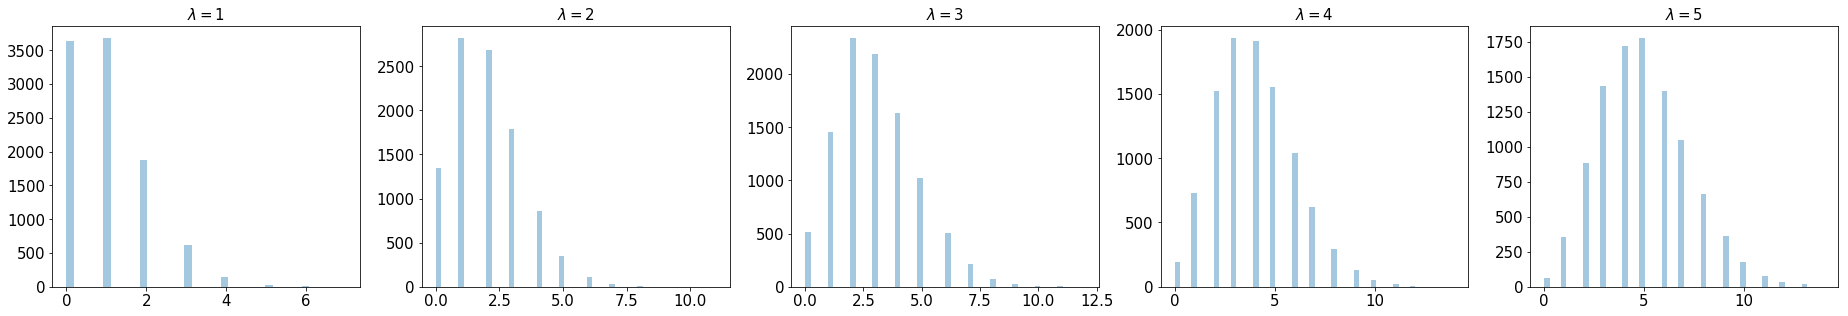

In [7]:
## Part 1: Experimenting with parameters

lambdas = [i + 1 for i in range(5)]

nrows = 1
ncols = 5
fig, ax = plt.subplots(nrows, ncols, figsize=(fig_size[0] * ncols, fig_size[1] * nrows))
ax = np.reshape(ax, (nrows, ncols))

for i, j in product(range(nrows), range(ncols)):
    _ = sns.distplot(np.random.poisson(lam=lambdas[j], size=int(1e4)), ax=ax[i, j], kde=False)
    _ = ax[i, j].set_title(f"$\lambda = {lambdas[j]}$", fontsize=15)
    _ = ax[i, j].tick_params(labelsize=15)

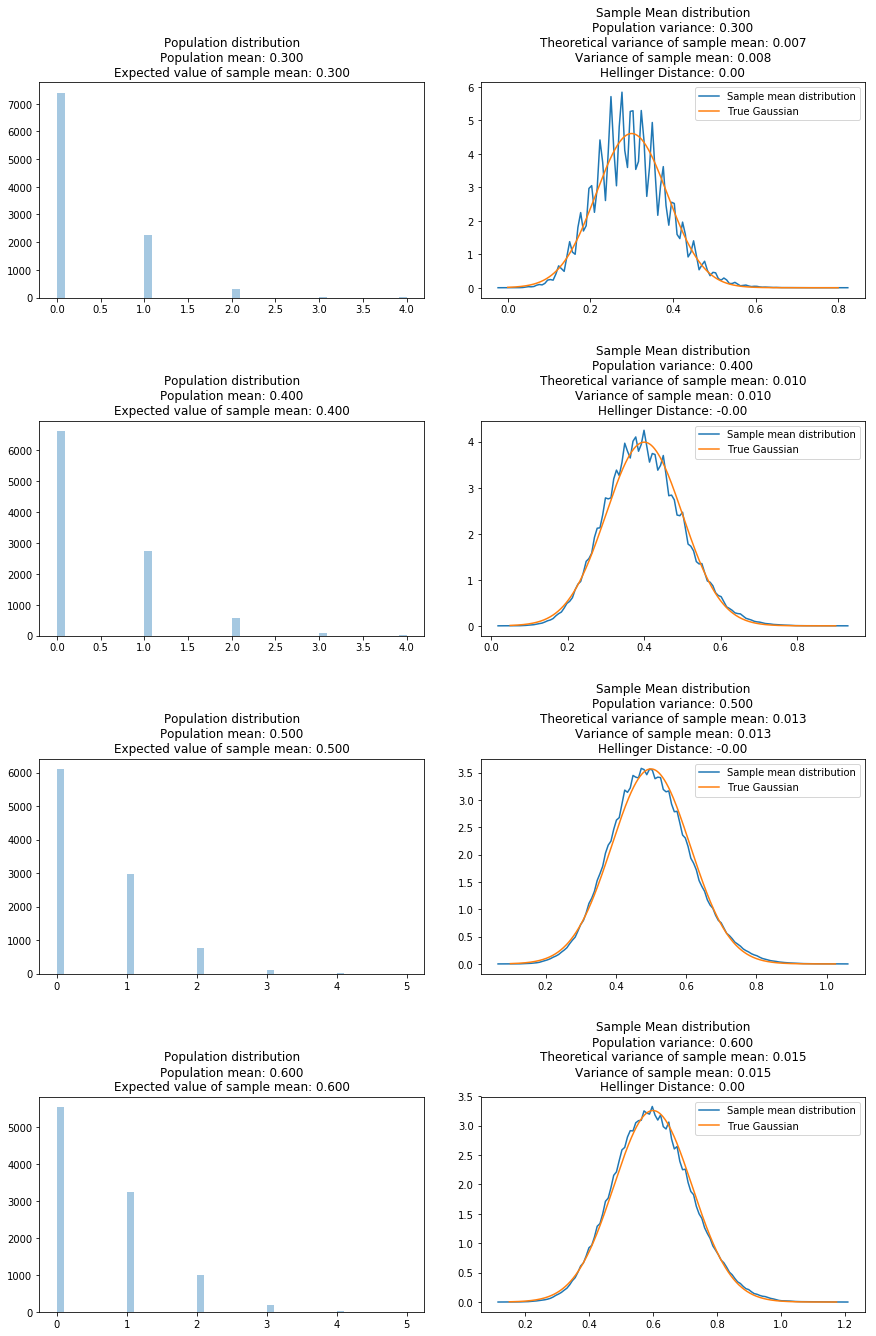

In [8]:
## Part 2: Central Limit Theorem

nrows = 4
ncols = 2
fig, ax = plt.subplots(nrows, ncols, figsize=(fig_size[0] * ncols, fig_size[1] * nrows))

for count, lambda_ in enumerate([0.3, 0.4, 0.5, 0.6]):
#     lambda_ = 0.4
    pop_mean = lambda_
    pop_var = lambda_
    SAMPLE_SIZE = 40
    RUNS = int(1e5)

    sample_means = [np.mean(np.random.poisson(lam=lambda_, size=SAMPLE_SIZE)) for _ in range(RUNS)]

    expect_sample_mean = np.mean(sample_means)
    theo_var_sample_mean = pop_var / SAMPLE_SIZE
    var_sample_mean = np.var(sample_means)

    hellinger_distance = hellinger(pop_mean, expect_sample_mean, np.sqrt(theo_var_sample_mean), np.sqrt(var_sample_mean))

    _ = sns.distplot(np.random.poisson(lam=lambda_, size=int(1e4)), ax=ax[count][0], kde=False)
    _ = ax[count][0].set(title=f"Population distribution\nPopulation mean: {pop_mean:.3f}\nExpected value of sample mean: {expect_sample_mean:.3f}")

    _ = sns.kdeplot(sample_means, ax=ax[count][1], label="Sample mean distribution")
    inputs = np.linspace(min(sample_means), max(sample_means), num=1000)
    _ = sns.lineplot(inputs, normal_pdf(inputs, pop_mean, np.sqrt(theo_var_sample_mean)), ax=ax[count][1], label="True Gaussian")
    _ = ax[count][1].set(title=f"Sample Mean distribution\nPopulation variance: {pop_var:.3f}\nTheoretical variance of sample mean: {theo_var_sample_mean:.3f}\nVariance of sample mean: {var_sample_mean:.3f}\nHellinger Distance: {hellinger_distance:.2f}")
    _ = ax[count][1].legend()
    
    
fig.tight_layout(pad=3.0)

## Negative Binomial Distribution
### Parameters:
The Negative Binomial distribution as 2 parameters $r$ and $k$.

### PMF and other statistics:
1. PMF: $p_X(k;n, p) = \binom{k + n - 1}{n - 1}p^n(1 - p)^k; k \in \{0, 1, 2, 3, ...\}$
2. Mean: $\frac{n(1 - p)}{p}$
3. Variance: $\frac{n(1 - p)}{p^2}$

*This distribution gives the probability of k failures and n - 1 successes in k + n - 1 trials and success on the (k + n)th trial.*

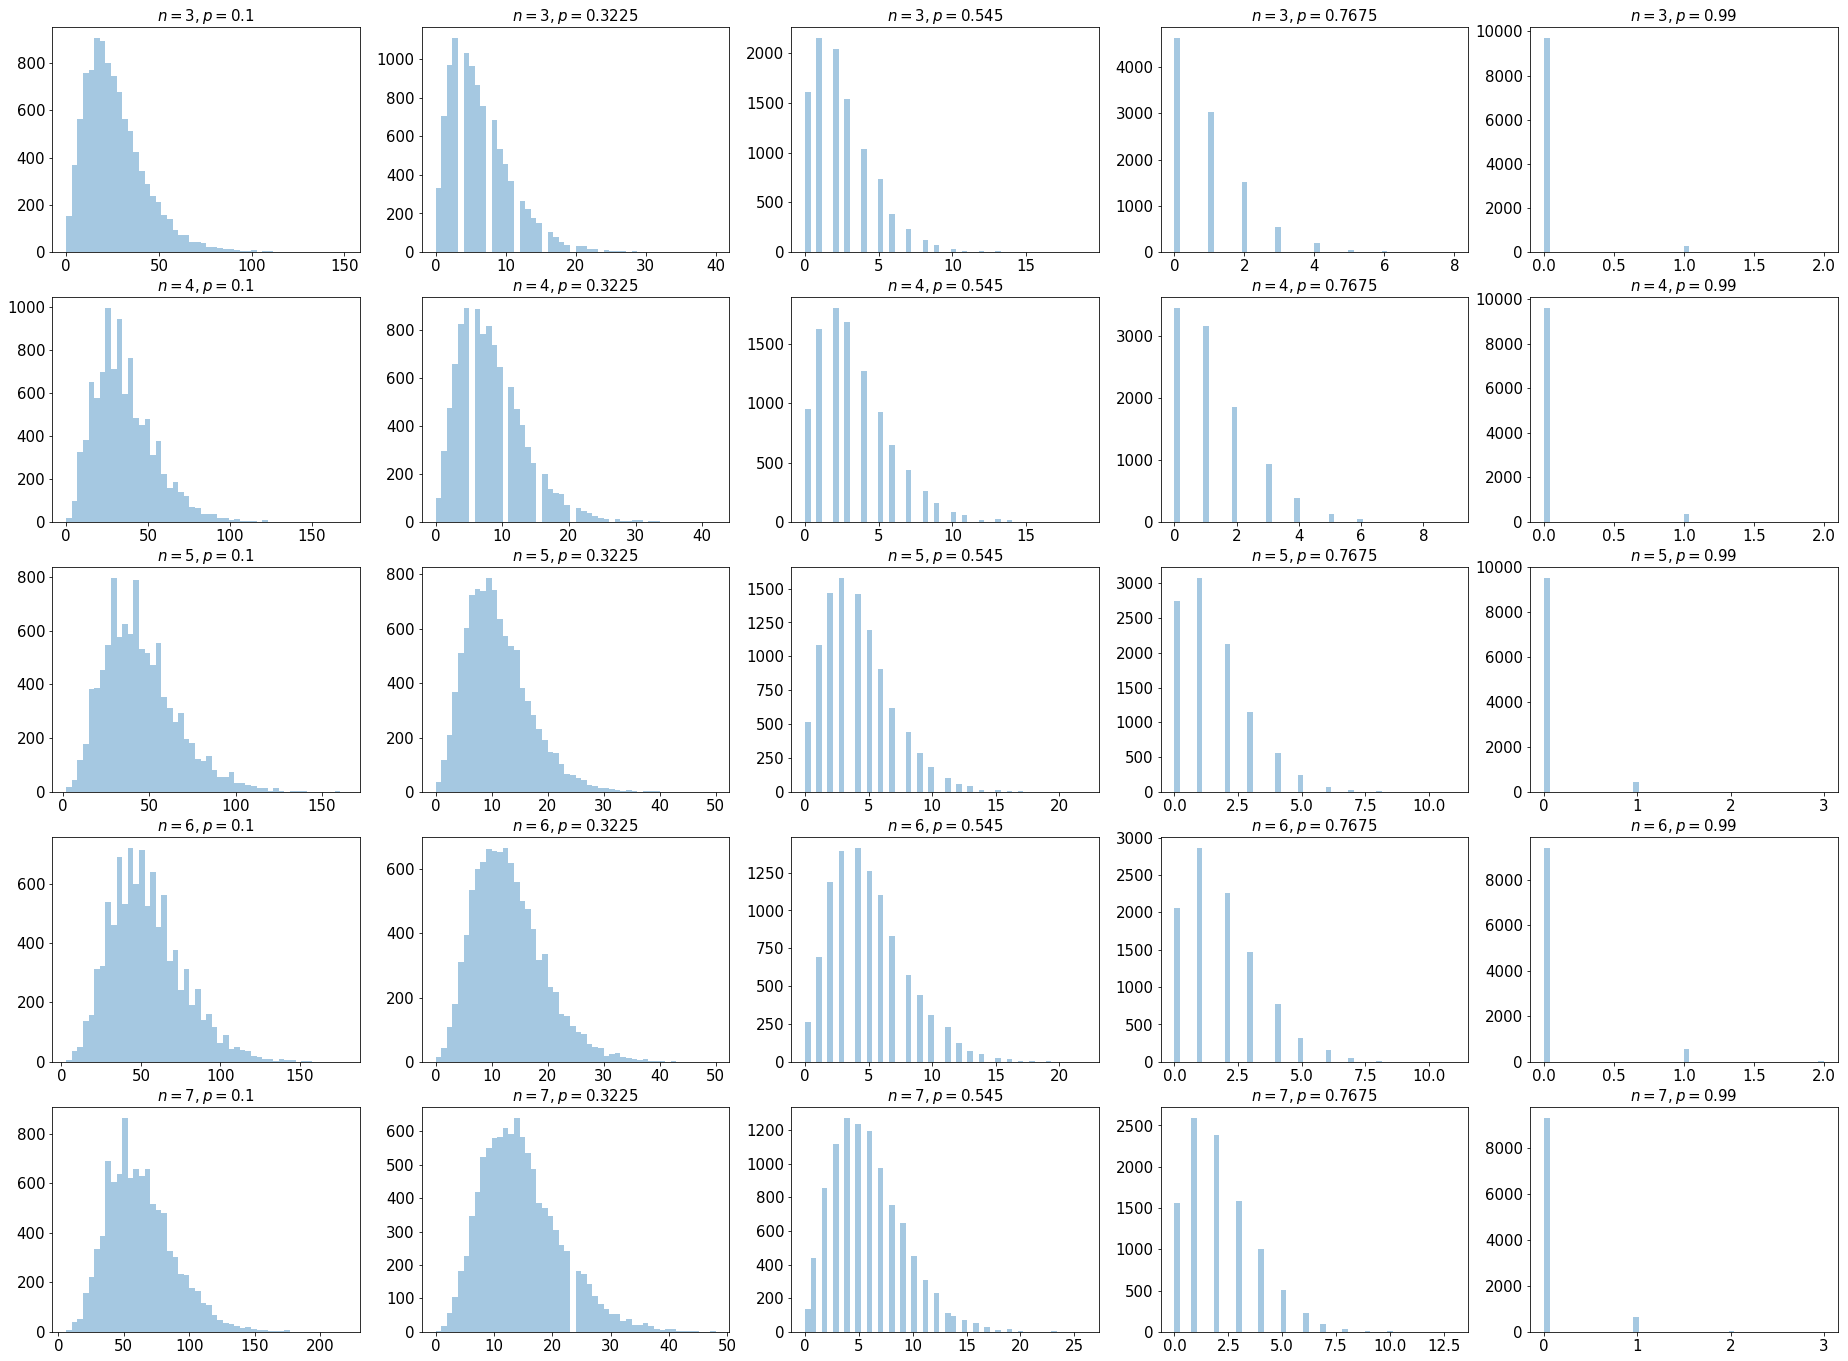

In [9]:
## Part 1: Experimenting with parameters

ns = [i + 3 for i in range(5)]
ps = np.linspace(0.1, 1 - 0.01, num=5)

nrows = 5
ncols = 5
fig, ax = plt.subplots(nrows, ncols, figsize=(fig_size[0] * ncols, fig_size[1] * nrows))
ax = np.reshape(ax, (nrows, ncols))

for i, j in product(range(nrows), range(ncols)):
    _ = sns.distplot(np.random.negative_binomial(n=ns[i], p=ps[j], size=int(1e4)), ax=ax[i, j], kde=False)
    _ = ax[i, j].set_title(f"$n={ns[i]}, p={ps[j]}$", fontsize=15)
    _ = ax[i, j].tick_params(labelsize=15)

plt.savefig("neg_binomial.png")

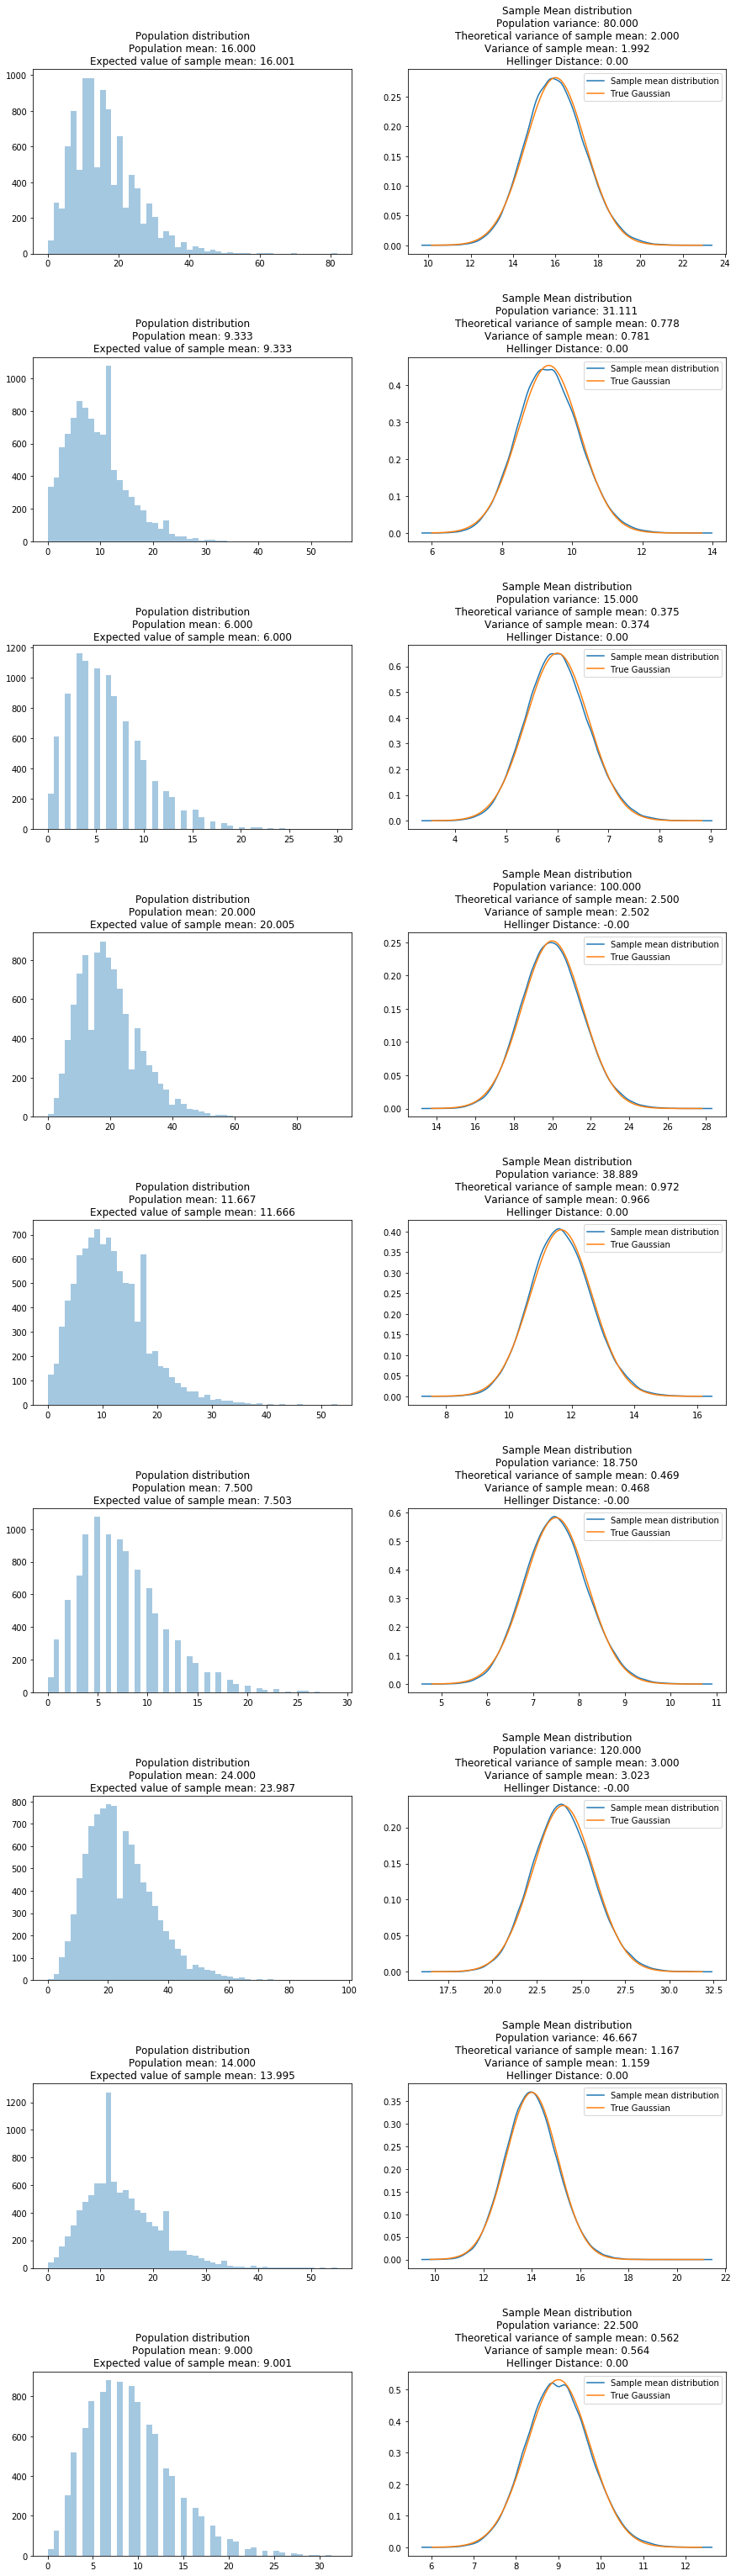

In [10]:
## Part 2: Central Limit Theorem

nrows = 9
ncols = 2
fig, ax = plt.subplots(nrows, ncols, figsize=(fig_size[0] * ncols, fig_size[1] * nrows))

count = 0
for n in [4, 5, 6]:
    for p in [0.2, 0.3, 0.4]:
#         n = 5
#         p = 0.2
        pop_mean = n * (1 - p) / p
        pop_var = n * (1 - p) / (p ** 2)
        SAMPLE_SIZE = 40
        RUNS = int(1e5)

        sample_means = [np.mean(np.random.negative_binomial(n=n, p=p, size=SAMPLE_SIZE)) for _ in range(RUNS)]

        expect_sample_mean = np.mean(sample_means)
        theo_var_sample_mean = pop_var / SAMPLE_SIZE
        var_sample_mean = np.var(sample_means)

        hellinger_distance = hellinger(pop_mean, expect_sample_mean, np.sqrt(theo_var_sample_mean), np.sqrt(var_sample_mean))

        _ = sns.distplot(np.random.negative_binomial(n=n, p=p, size=int(1e4)), ax=ax[count][0], kde=False)
        _ = ax[count][0].set(title=f"Population distribution\nPopulation mean: {pop_mean:.3f}\nExpected value of sample mean: {expect_sample_mean:.3f}")
        
        _ = sns.kdeplot(sample_means, ax=ax[count][1], label="Sample mean distribution")
        inputs = np.linspace(min(sample_means), max(sample_means), num=1000)
        _ = sns.lineplot(inputs, normal_pdf(inputs, pop_mean, np.sqrt(theo_var_sample_mean)), ax=ax[count][1], label="True Gaussian")
        _ = ax[count][1].set(title=f"Sample Mean distribution\nPopulation variance: {pop_var:.3f}\nTheoretical variance of sample mean: {theo_var_sample_mean:.3f}\nVariance of sample mean: {var_sample_mean:.3f}\nHellinger Distance: {hellinger_distance:.2f}")
        _ = ax[count][1].legend()
        
        count += 1
        
fig.tight_layout(pad=3.0)

## Discrete Uniform Distribution
### Parameters:
The Discrete Uniform distribution has two parameters $a$ and $b$.

### PMF and other statistics:
1. PMF: $p_X(k; a, b) = \frac{1}{b - a + 1}; k \in \{a, a + 1, a + 2, ... b - 2, b - 1, b\}$
2. Mean: $\frac{a + b}{2}$
3. Variance: $\frac{(b - a + 1)^2 - 1}{12}$

*This distribution gives the probability of picking a number between a and b. All numbers between a and b are equally likely.*

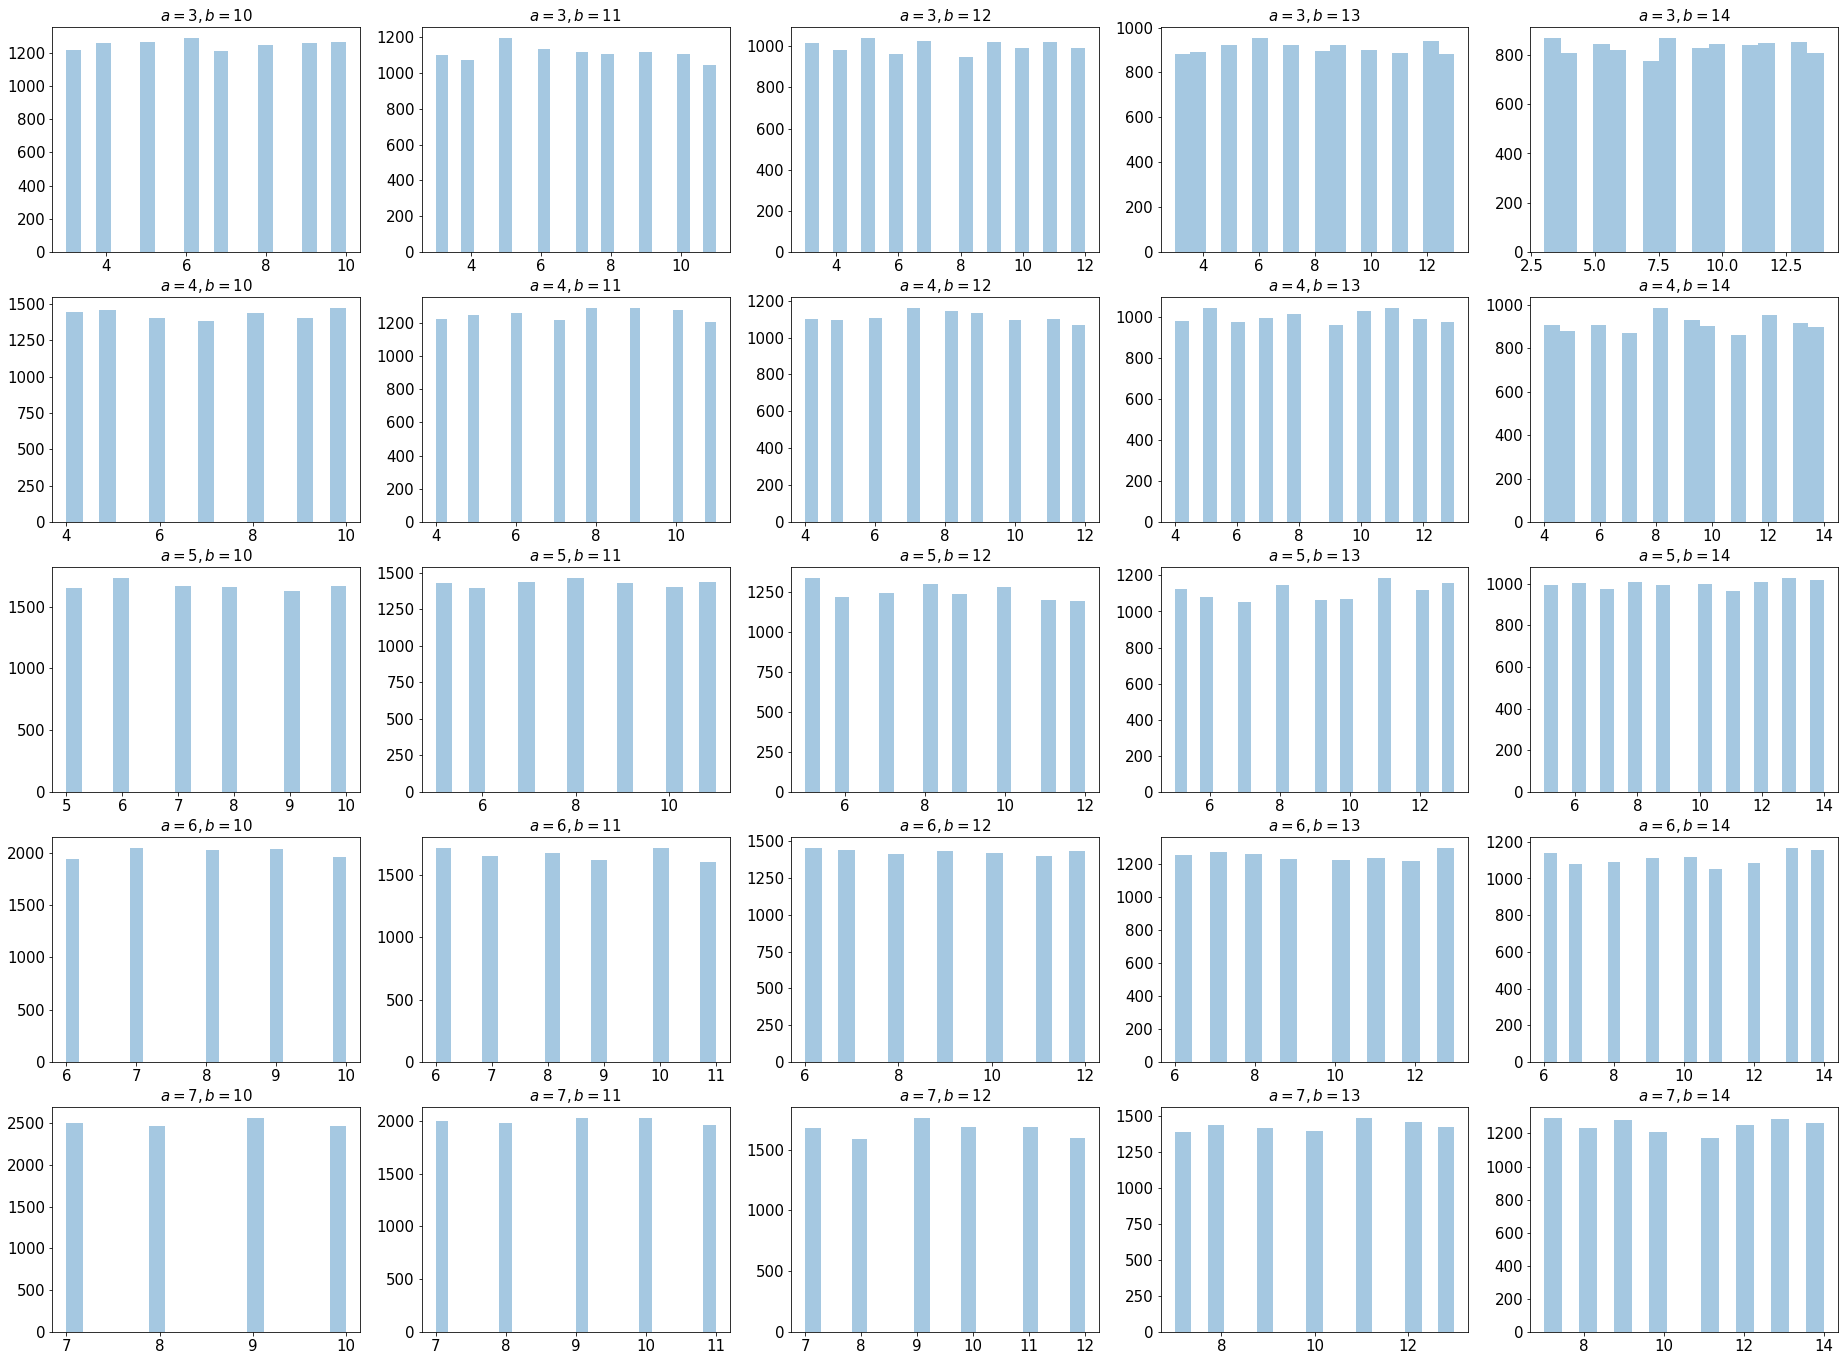

In [11]:
## Part 1: Experimenting with parameters

as_ = [i + 3 for i in range(5)]
bs = [i + 10 for i in range(5)]

nrows = 5
ncols = 5
fig, ax = plt.subplots(nrows, ncols, figsize=(fig_size[0] * ncols, fig_size[1] * nrows))
ax = np.reshape(ax, (nrows, ncols))

for i, j in product(range(nrows), range(ncols)):
    _ = sns.distplot(np.random.choice(a=list(range(as_[i], bs[j] + 1)), size=int(1e4)), ax=ax[i, j], kde=False)
    _ = ax[i, j].set_title(f"$a={as_[i]}, b={bs[j]}$", fontsize=15)
    _ = ax[i, j].tick_params(labelsize=15)

plt.savefig("discrete_uniform.png")

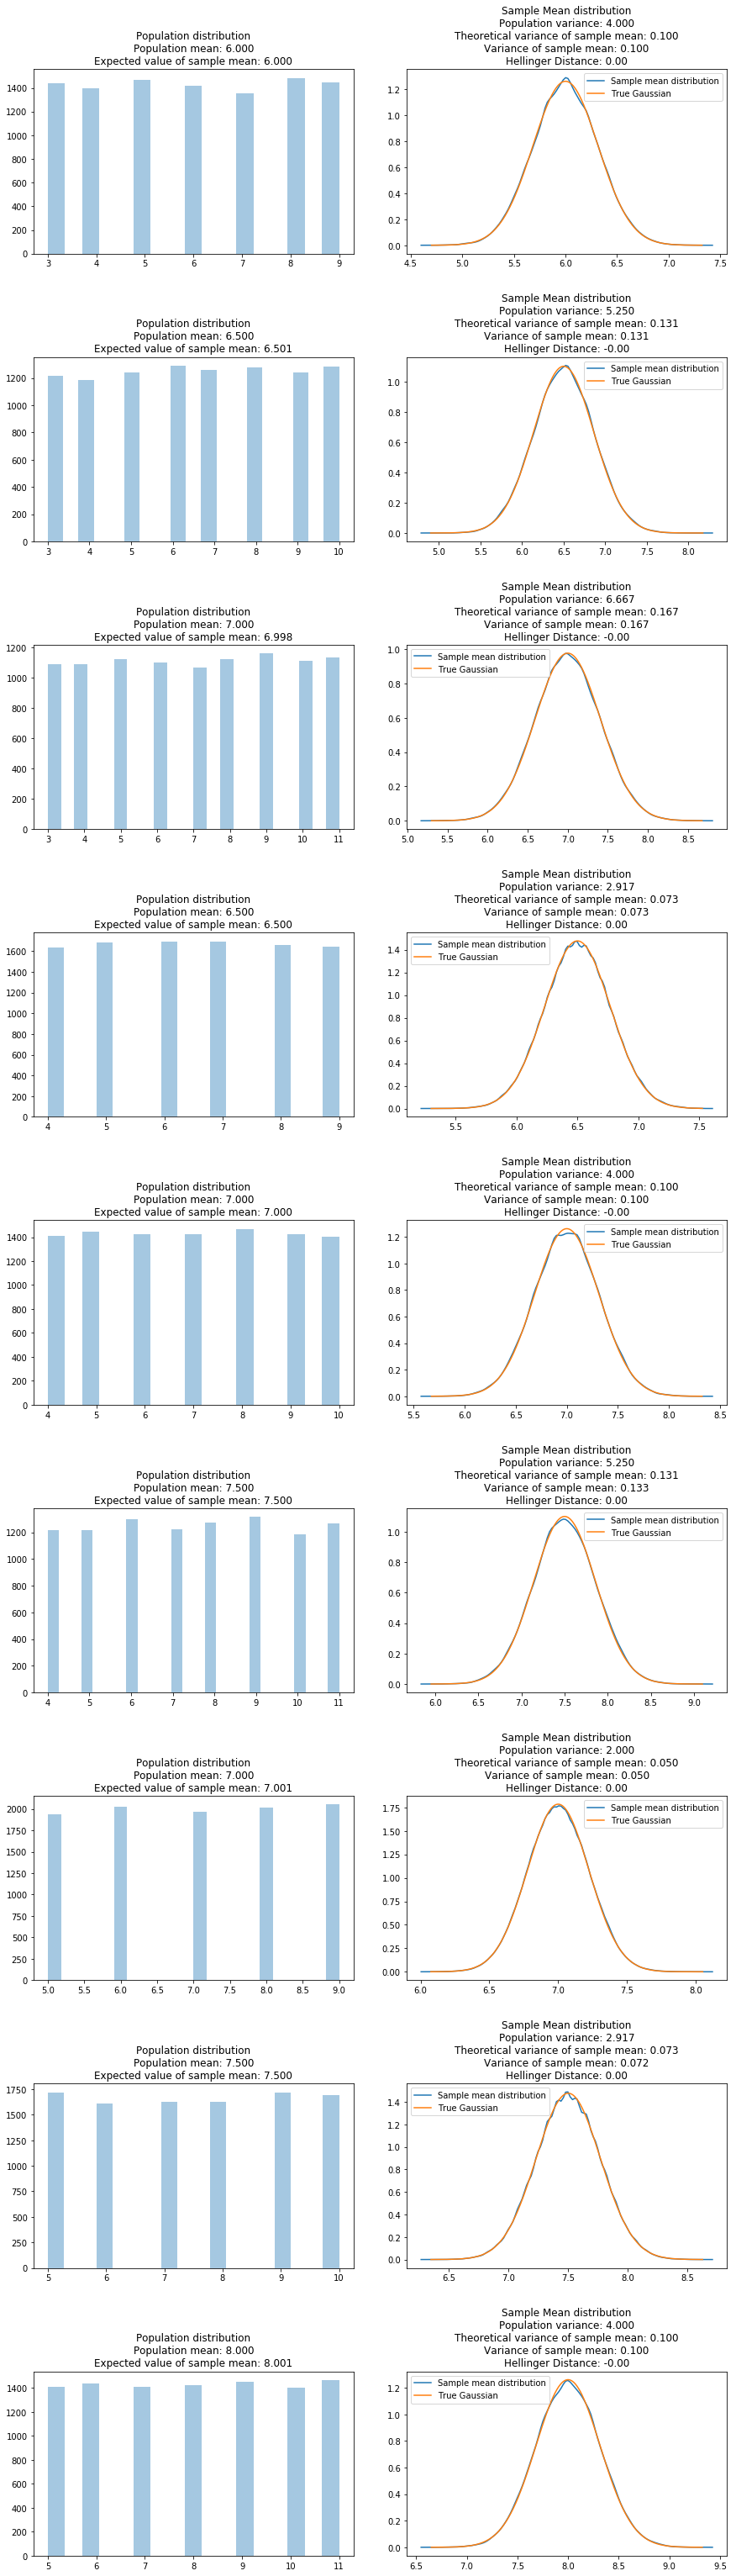

In [12]:
## Part 2: Central Limit Theorem

nrows = 9
ncols = 2
fig, ax = plt.subplots(nrows, ncols, figsize=(fig_size[0] * ncols, fig_size[1] * nrows))

count = 0
for a in [3, 4, 5]:
    for b in [9, 10, 11]:
#         a = 4
#         b = 10
        pop_mean = (a + b) / 2
        pop_var = (((b - a + 1) ** 2) - 1) / 12
        SAMPLE_SIZE = 40
        RUNS = int(1e5)

        sample_means = [np.mean(np.random.choice(list(range(a, b + 1)), size=SAMPLE_SIZE)) for _ in range(RUNS)]

        expect_sample_mean = np.mean(sample_means)
        theo_var_sample_mean = pop_var / SAMPLE_SIZE
        var_sample_mean = np.var(sample_means)

        hellinger_distance = hellinger(pop_mean, expect_sample_mean, np.sqrt(theo_var_sample_mean), np.sqrt(var_sample_mean))

        _ = sns.distplot(np.random.choice(a=list(range(a, b + 1)), size=int(1e4)), ax=ax[count][0], kde=False)
        _ = ax[count][0].set(title=f"Population distribution\nPopulation mean: {pop_mean:.3f}\nExpected value of sample mean: {expect_sample_mean:.3f}")
        
        _ = sns.kdeplot(sample_means, ax=ax[count][1], label="Sample mean distribution")
        inputs = np.linspace(min(sample_means), max(sample_means), num=1000)
        _ = sns.lineplot(inputs, normal_pdf(inputs, pop_mean, np.sqrt(theo_var_sample_mean)), ax=ax[count][1], label="True Gaussian")
        _ = ax[count][1].set(title=f"Sample Mean distribution\nPopulation variance: {pop_var:.3f}\nTheoretical variance of sample mean: {theo_var_sample_mean:.3f}\nVariance of sample mean: {var_sample_mean:.3f}\nHellinger Distance: {hellinger_distance:.2f}")
        _ = ax[count][1].legend()
        
        count += 1
        
fig.tight_layout(pad=3.0)

# Continuous Distributions

## Normal Distribution
### Parameters:
The Normal distribution has two parameters $\mu$ and $\sigma$<br>

### PDF and other statistics:
1. PDF: $f_X(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma}e^{(-\frac{(x - \mu)^2}{2\sigma^2})}; -\infty \leq x \leq \infty$
2. Mean: $\mu$
3. Variance: $\sigma^2$

### Occurences and Applications:
- The Normal distribution is very common in modelling real world population data.
  - For e.g., the heights of a certain population follows a normal distribution.
- Some physical quantities are distributed normally.
- It also appears in the Central Limit Theorem, which states that the sample mean of N samples follows a Normal distribution with same mean and reduced variance.

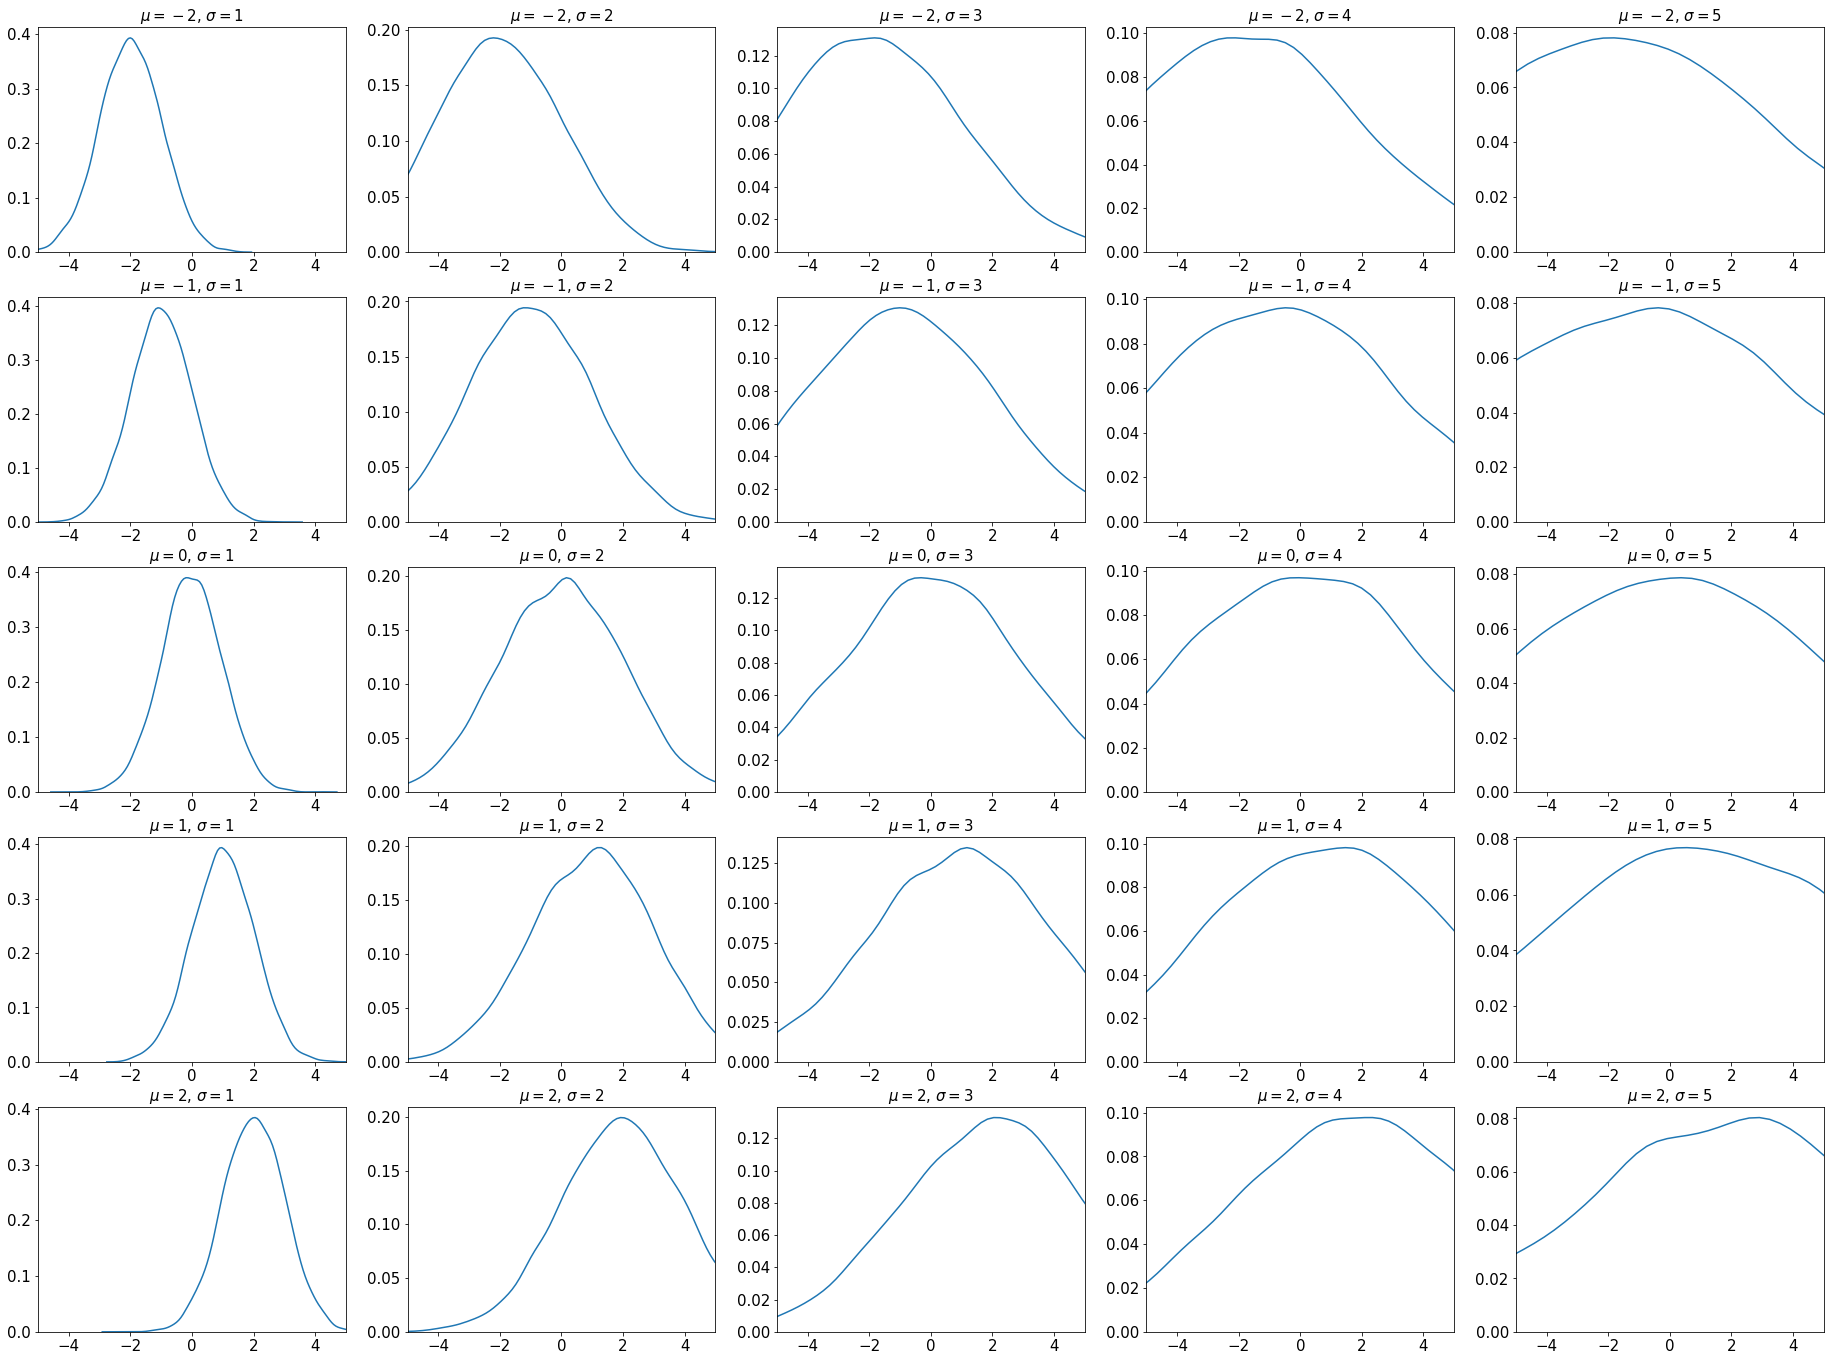

In [13]:
## Part 1: Experimenting with parameters

mus = [i - 2 for i in range(5)]
sigmas = [i + 1 for i in range(5)]

nrows = 5
ncols = 5
fig, ax = plt.subplots(nrows, ncols, figsize=(fig_size[0] * ncols, fig_size[1] * nrows))
ax = np.reshape(ax, (nrows, ncols))

for i, j in product(range(nrows), range(ncols)):
    _ = sns.distplot(np.random.normal(loc=mus[i], scale=sigmas[j], size=int(1e4)), ax=ax[i, j], hist=False)
    _ = ax[i, j].set_title(fr"$\mu={mus[i]}$, $\sigma={sigmas[j]}$", fontsize=15)
    _ = ax[i, j].set_xlim(-5, 5)
    _ = ax[i, j].tick_params(labelsize=15)
    
plt.savefig("normal.png")

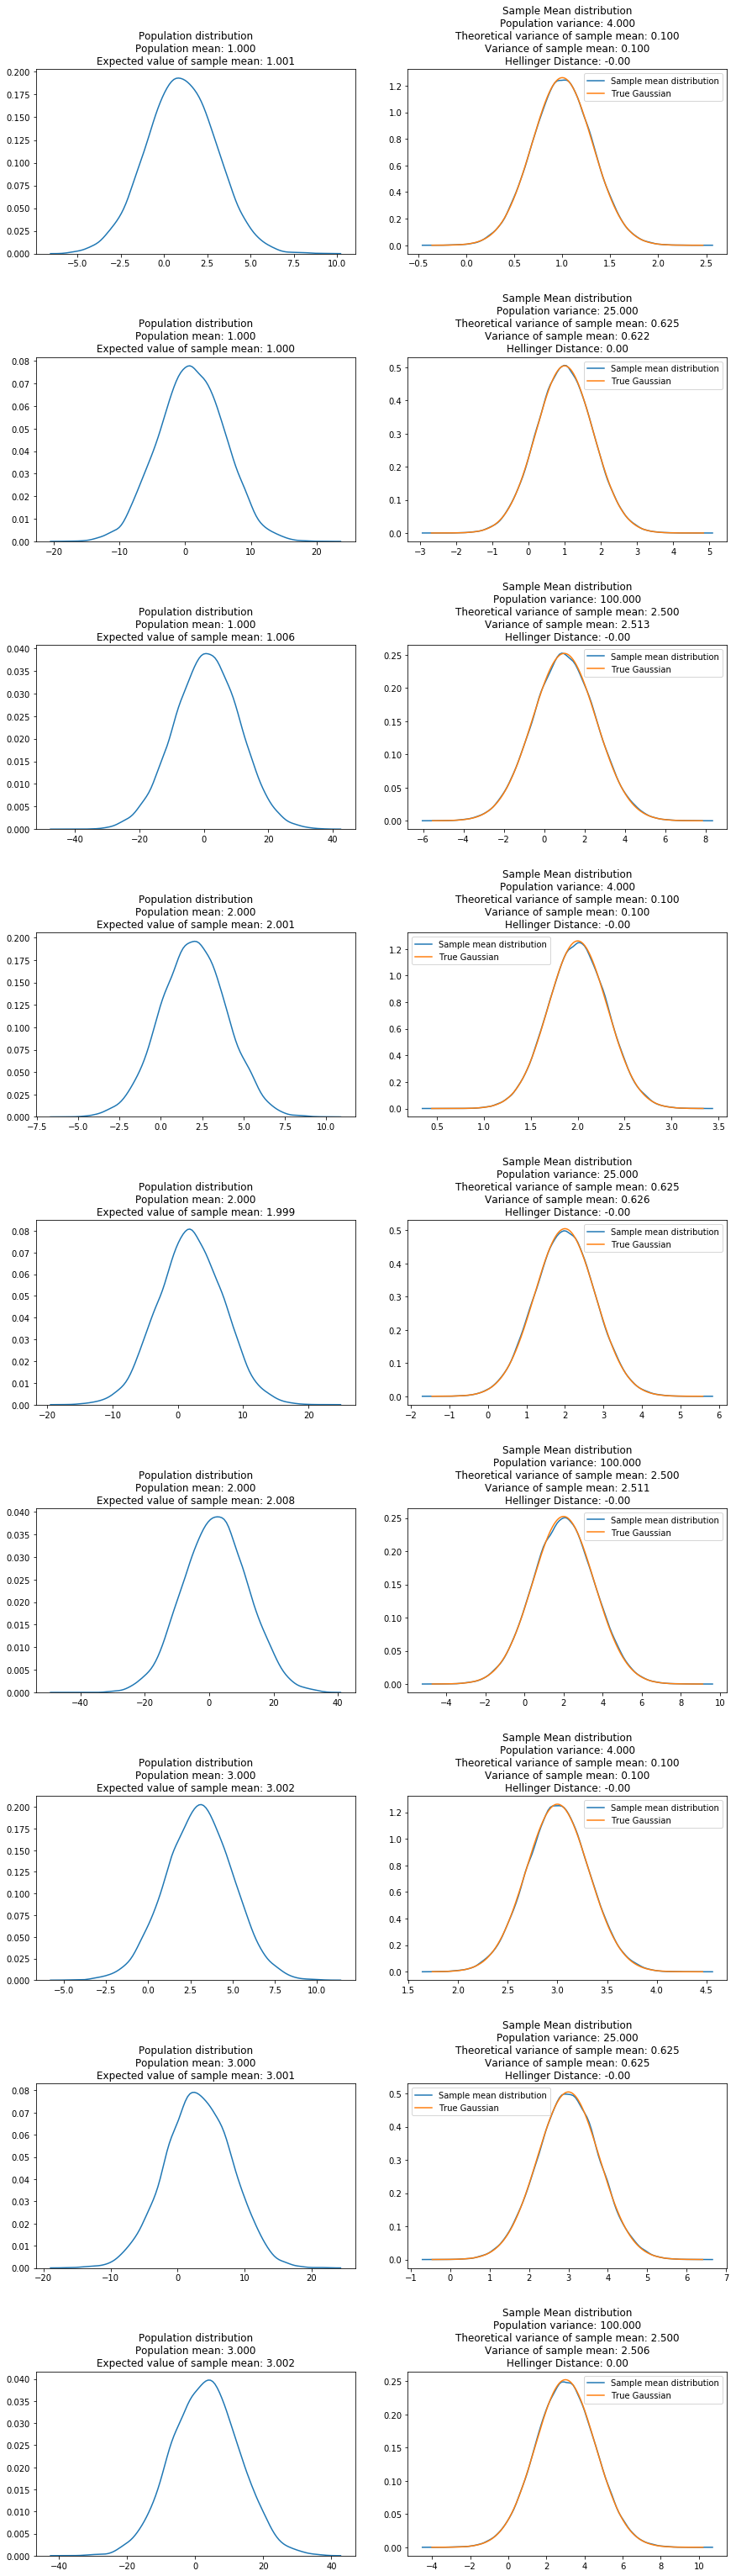

In [14]:
## Part 2: Central Limit Theorem

nrows = 9
ncols = 2
fig, ax = plt.subplots(nrows, ncols, figsize=(fig_size[0] * ncols, fig_size[1] * nrows))

count = 0
for mu in [1, 2, 3]:
    for sigma in [2, 5, 10]:
        # mu = 2
        # sigma = 2.5
        pop_mean = mu
        pop_var = sigma ** 2
        SAMPLE_SIZE = 40
        RUNS = int(1e5)

        sample_means = [np.mean(np.random.normal(loc=mu, scale=sigma, size=SAMPLE_SIZE)) for _ in range(RUNS)]

        expect_sample_mean = np.mean(sample_means)
        theo_var_sample_mean = pop_var / SAMPLE_SIZE
        var_sample_mean = np.var(sample_means)

        hellinger_distance = hellinger(pop_mean, expect_sample_mean, np.sqrt(theo_var_sample_mean), np.sqrt(var_sample_mean))

        _ = sns.distplot(np.random.normal(loc=mu, scale=sigma, size=int(1e4)), ax=ax[count][0], hist=False)
        _ = ax[count][0].set(title=f"Population distribution\nPopulation mean: {pop_mean:.3f}\nExpected value of sample mean: {expect_sample_mean:.3f}")
        
        _ = sns.kdeplot(sample_means, ax=ax[count][1], label="Sample mean distribution")
        inputs = np.linspace(min(sample_means), max(sample_means), num=1000)
        _ = sns.lineplot(inputs, normal_pdf(inputs, pop_mean, np.sqrt(theo_var_sample_mean)), ax=ax[count][1], label="True Gaussian")
        _ = ax[count][1].set(title=f"Sample Mean distribution\nPopulation variance: {pop_var:.3f}\nTheoretical variance of sample mean: {theo_var_sample_mean:.3f}\nVariance of sample mean: {var_sample_mean:.3f}\nHellinger Distance: {hellinger_distance:.2f}")
        _ = ax[count][1].legend()
        
        count += 1
        
fig.tight_layout(pad=3.0)

## Exponential Distribution
### Parameters:
The Exponential distribution has one parameter $\lambda$<br>

### PDF and other statistics:
1. PDF: $f_X(x; \lambda) = \lambda e^{-\lambda x}; 0 \leq x \leq \infty$
2. Mean: $\frac{1}{\lambda}$
3. Variance: $\frac{1}{\lambda^2}$

### Occurences and Applications:
- The Exponential distribution is used to model the wait time between the occurrence of two similar events.
  - For e.g., the time between the arrivals of buses at a bus stop follows an exponential distribution.
- It is the continuous version of the Geometric distribution.
- This distribution can also be used to model situations where events occur with constant probability per unit length.
  - For e.g.:
    - distance between mutations on a DNA strand
    - distance between roadkills on a highway.
- In queueing theory, the time taken by agents (or representatives) to fully serve a customer follows an exponential distribution.

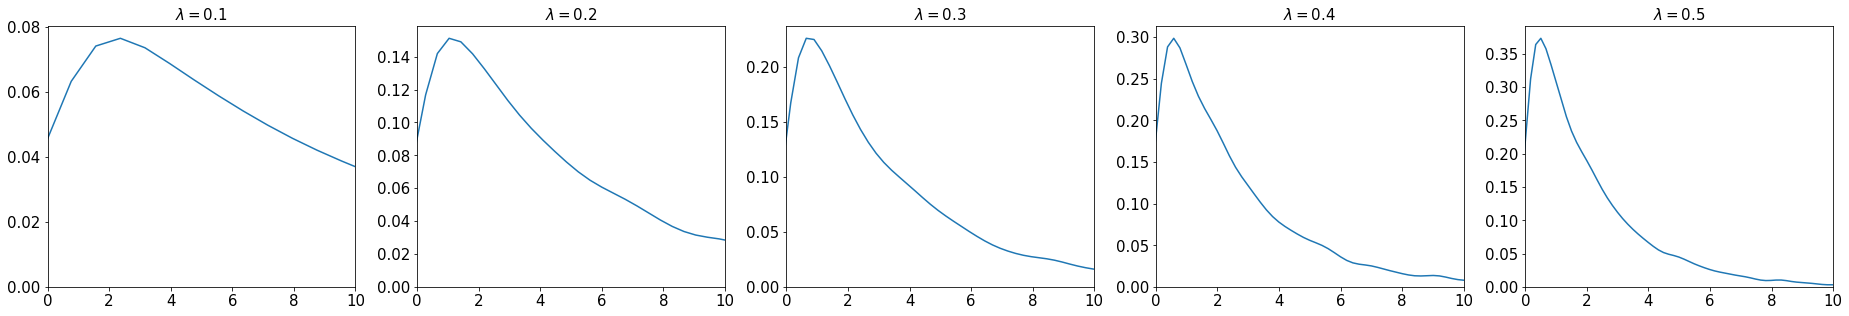

In [15]:
## Part 1: Experimenting with parameters

lambdas = [0.1 * (i + 1) for i in range(5)]

nrows = 1
ncols = 5
fig, ax = plt.subplots(nrows, ncols, figsize=(fig_size[0] * ncols, fig_size[1] * nrows))
ax = np.reshape(ax, (nrows, ncols))

for i, j in product(range(nrows), range(ncols)):
    _ = sns.distplot(np.random.exponential(scale=1 / lambdas[j], size=int(1e4)), ax=ax[i, j], hist=False)
    _ = ax[i, j].set_title(fr"$\lambda={lambdas[j]:.1f}$", fontsize=15)
    _ = ax[i, j].set_xlim(0, 10)
    _ = ax[i, j].tick_params(labelsize=15)

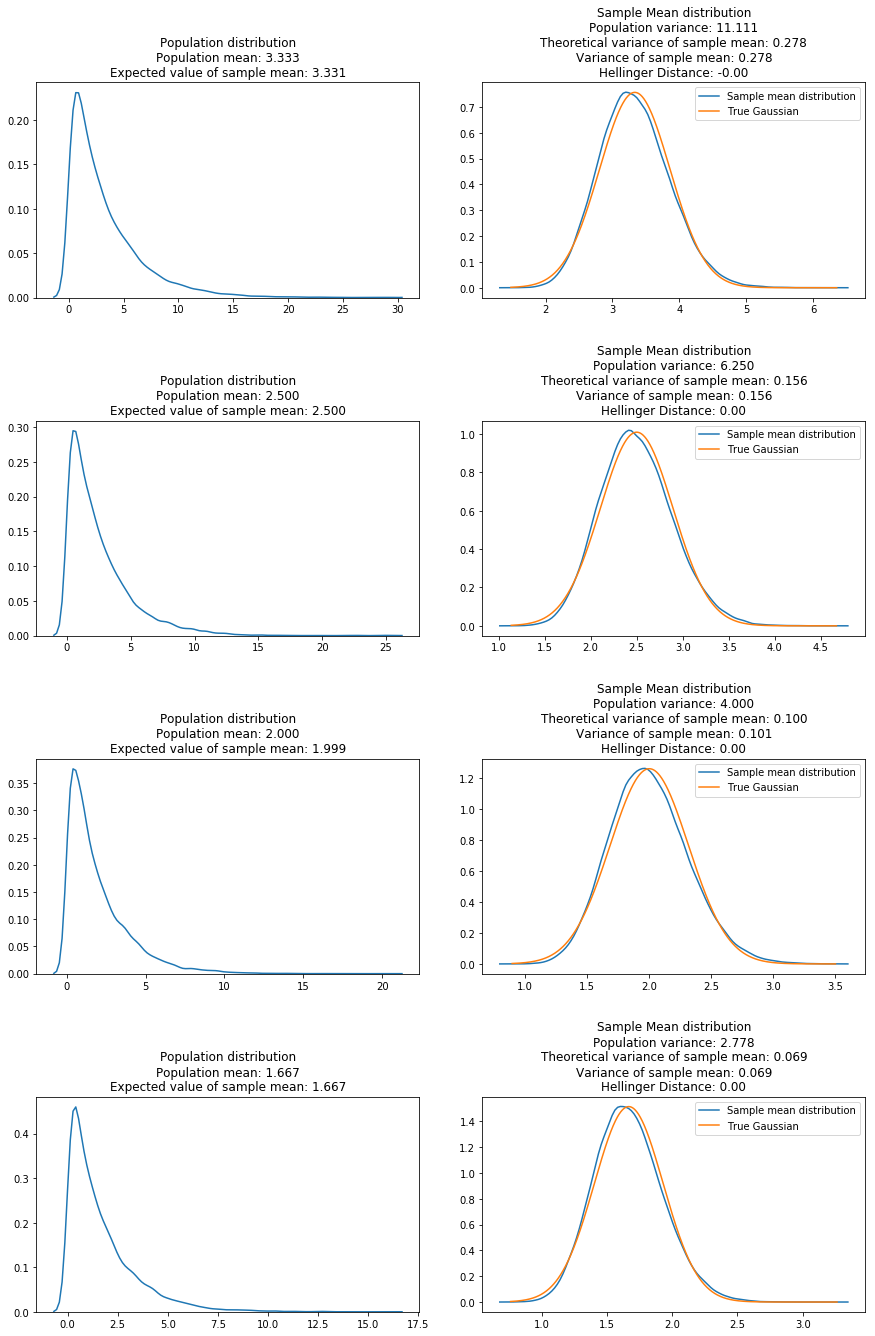

In [16]:
## Part 2: Central Limit Theorem

nrows = 4
ncols = 2
fig, ax = plt.subplots(nrows, ncols, figsize=(fig_size[0] * ncols, fig_size[1] * nrows))

count = 0
for lambda_ in [0.3, 0.4, 0.5, 0.6]:
    # lambda_ = 2.5
    pop_mean = 1 / lambda_
    pop_var = 1 / (lambda_ ** 2)
    SAMPLE_SIZE = 40
    RUNS = int(1e5)

    sample_means = [np.mean(np.random.exponential(scale = 1 / lambda_, size=SAMPLE_SIZE)) for _ in range(RUNS)]

    expect_sample_mean = np.mean(sample_means)
    theo_var_sample_mean = pop_var / SAMPLE_SIZE
    var_sample_mean = np.var(sample_means)

    hellinger_distance = hellinger(pop_mean, expect_sample_mean, np.sqrt(theo_var_sample_mean), np.sqrt(var_sample_mean))

    _ = sns.distplot(np.random.exponential(scale=1 / lambda_, size=int(1e4)), ax=ax[count][0], hist=False)
    _ = ax[count][0].set(title=f"Population distribution\nPopulation mean: {pop_mean:.3f}\nExpected value of sample mean: {expect_sample_mean:.3f}")

    _ = sns.kdeplot(sample_means, ax=ax[count][1], label="Sample mean distribution")
    inputs = np.linspace(min(sample_means), max(sample_means), num=1000)
    _ = sns.lineplot(inputs, normal_pdf(inputs, pop_mean, np.sqrt(theo_var_sample_mean)), ax=ax[count][1], label="True Gaussian")
    _ = ax[count][1].set(title=f"Sample Mean distribution\nPopulation variance: {pop_var:.3f}\nTheoretical variance of sample mean: {theo_var_sample_mean:.3f}\nVariance of sample mean: {var_sample_mean:.3f}\nHellinger Distance: {hellinger_distance:.2f}")
    _ = ax[count][1].legend()

    count += 1
    
fig.tight_layout(pad=3.0)

## Beta Distribution
### Parameters:
The Beta distribution has two parameters $\alpha$ and $\beta$

### PDF and other statitistics:
1. PDF: $f_X(x; \alpha, \beta) = \frac{x^{\alpha - 1}(1 - x)^{\beta - 1}}{B(\alpha, \beta)}; 0 \leq x \leq 1$
  - Where $B(\alpha, \beta)$ is the [Beta function](https://en.wikipedia.org/wiki/Beta_function).
2. Mean: $\frac{\alpha}{\alpha + \beta}$
3. Variance: $\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$

### Occurences and Applications:
- It is quite useful in theory of order statistics. One result is that the *kth* smallest of a sample of size *n* drawn from a continuous uniform distribution follows a Beta distribution.
  $U_{(k)} \sim B(k, n + 1 - k)$
- In [subjective logic](https://en.wikipedia.org/wiki/Subjective_logic), the posteriori probability estimates can be modelled with beta distributions.

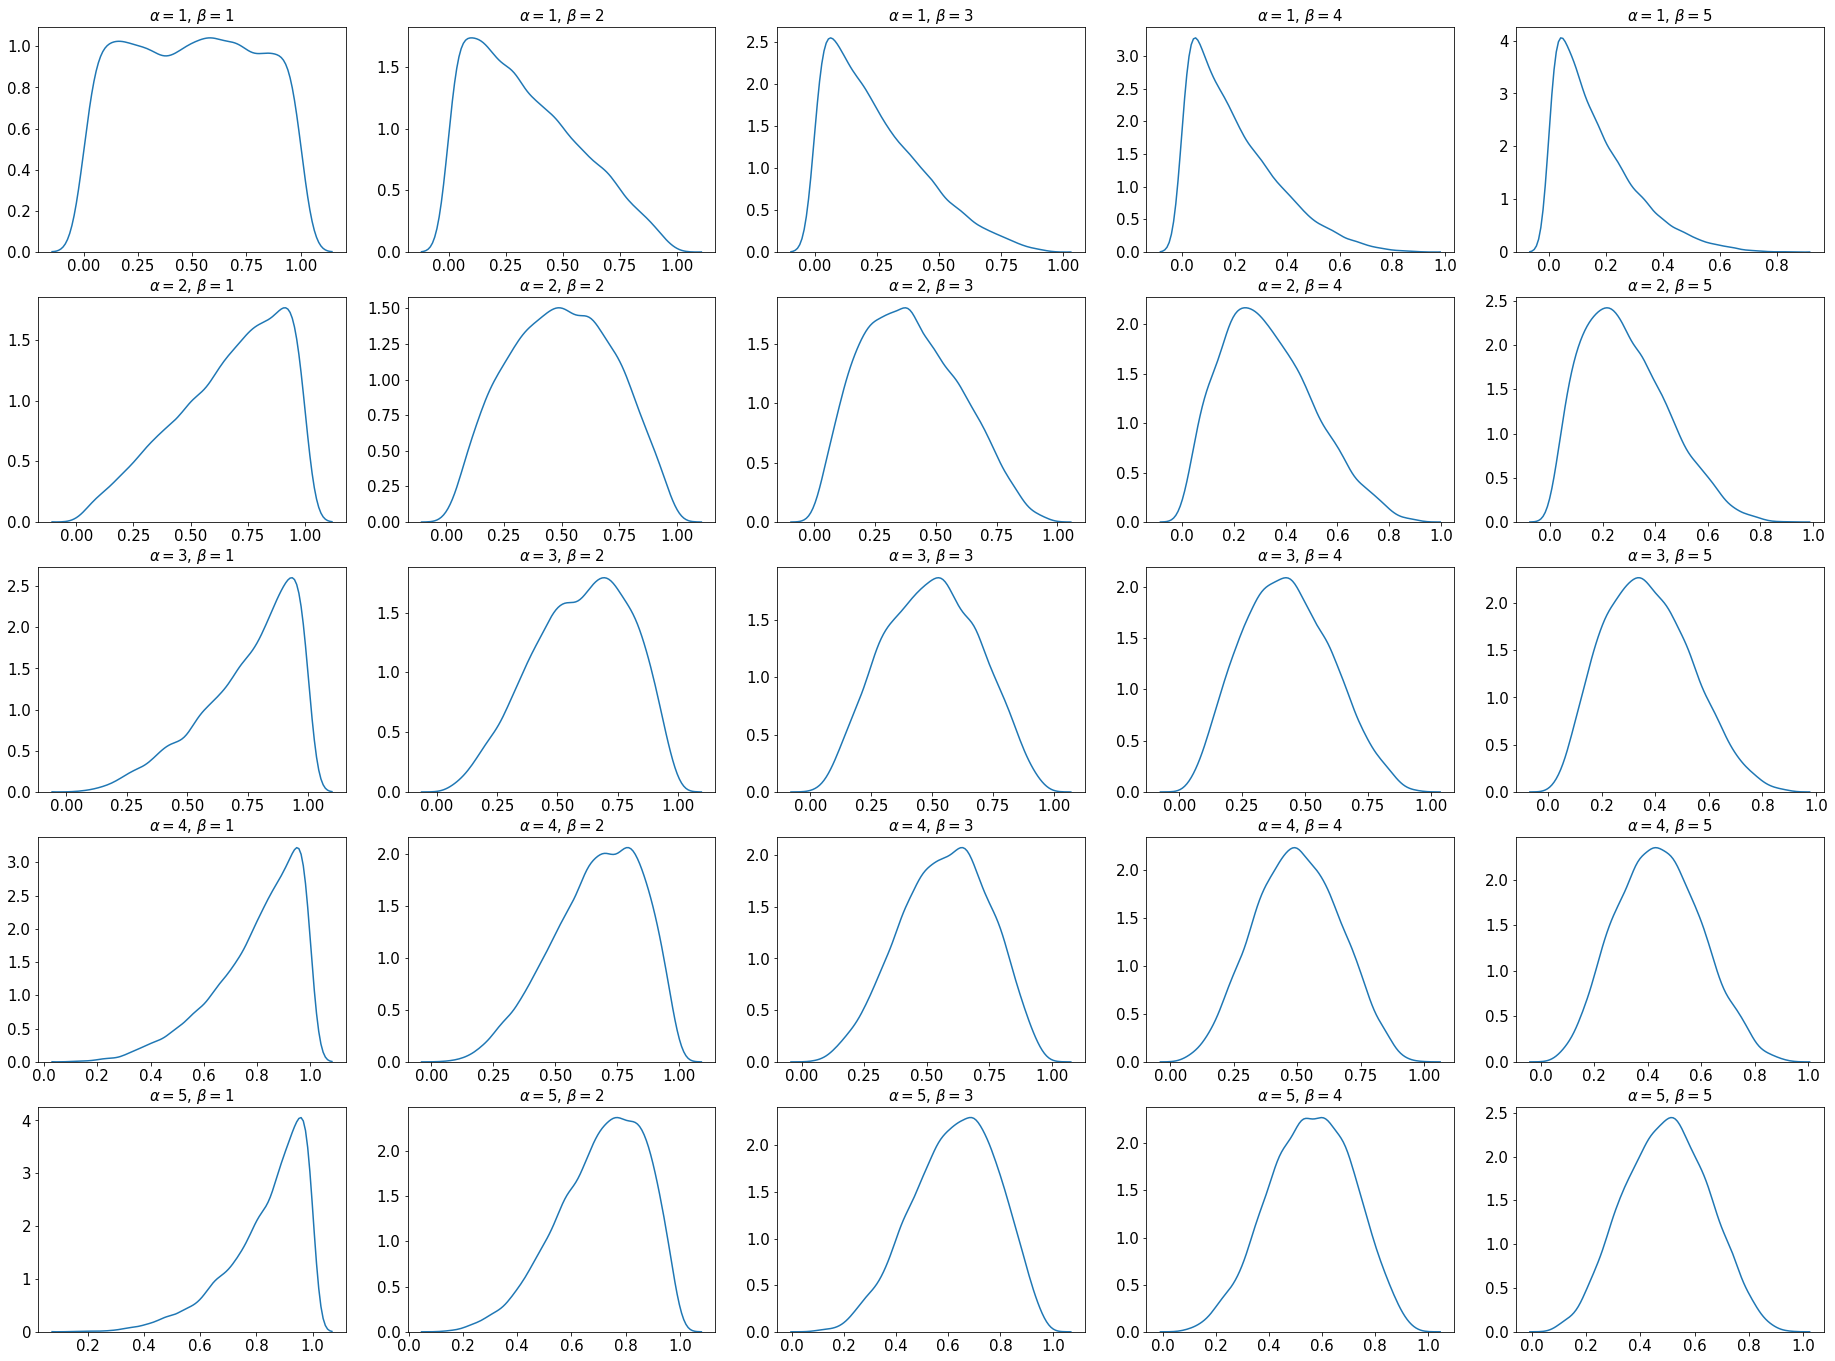

In [17]:
## Part 1: Experimenting with parameters

alphas = list(range(1, 5 + 1))
betas = list(range(1, 5 + 1))

nrows = 5
ncols = 5
fig, ax = plt.subplots(nrows, ncols, figsize=(fig_size[0] * ncols, fig_size[1] * nrows))
ax = np.reshape(ax, (nrows, ncols))

for i, j in product(range(nrows), range(ncols)):
    _ = sns.distplot(np.random.beta(a=alphas[i], b=betas[j], size=int(1e4)), ax=ax[i, j], hist=False)
    _ = ax[i, j].set_title(fr"$\alpha={alphas[i]}$, $\beta={betas[j]}$", fontsize=15)
    _ = ax[i, j].tick_params(labelsize=15)
    
plt.savefig("beta.png")

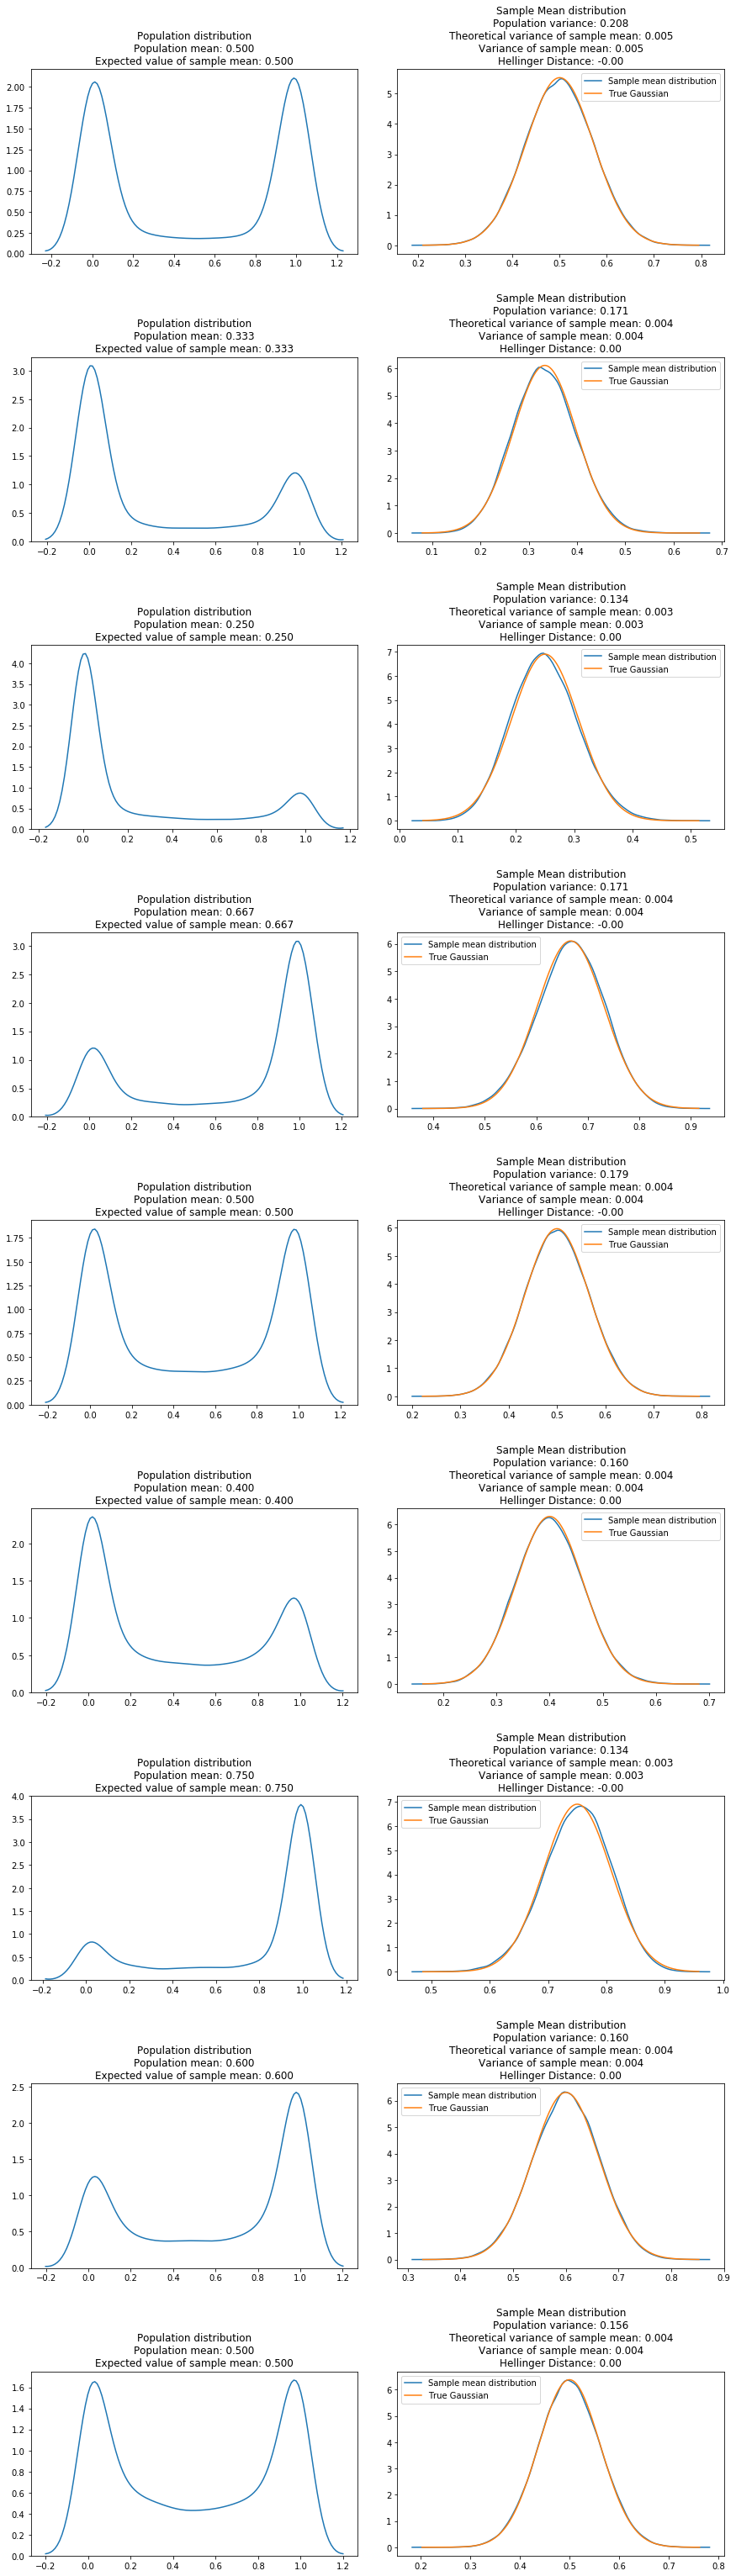

In [18]:
## Part 2: Central Limit Theorem

nrows = 9
ncols = 2
fig, ax = plt.subplots(nrows, ncols, figsize=(fig_size[0] * ncols, fig_size[1] * nrows))

count = 0
for alpha in [0.1, 0.2, 0.3]:
    for beta in [0.1, 0.2, 0.3]:
        # alpha = 0.2
        # beta = 0.2
        pop_mean = alpha / (alpha + beta)
        pop_var = (alpha * beta) / (((alpha + beta) ** 2) * (alpha + beta + 1))
        SAMPLE_SIZE = 40
        RUNS = int(1e5)

        sample_means = [np.mean(np.random.beta(a=alpha, b=beta, size=SAMPLE_SIZE)) for _ in range(RUNS)]

        expect_sample_mean = np.mean(sample_means)
        theo_var_sample_mean = pop_var / SAMPLE_SIZE
        var_sample_mean = np.var(sample_means)

        hellinger_distance = hellinger(pop_mean, expect_sample_mean, np.sqrt(theo_var_sample_mean), np.sqrt(var_sample_mean))

        _ = sns.distplot(np.random.beta(a=alpha, b=beta, size=int(1e4)), ax=ax[count][0], hist=False)
        _ = ax[count][0].set(title=f"Population distribution\nPopulation mean: {pop_mean:.3f}\nExpected value of sample mean: {expect_sample_mean:.3f}")

        _ = sns.kdeplot(sample_means, ax=ax[count][1], label="Sample mean distribution")
        inputs = np.linspace(min(sample_means), max(sample_means), num=1000)
        _ = sns.lineplot(inputs, normal_pdf(inputs, pop_mean, np.sqrt(theo_var_sample_mean)), ax=ax[count][1], label="True Gaussian")
        _ = ax[count][1].set(title=f"Sample Mean distribution\nPopulation variance: {pop_var:.3f}\nTheoretical variance of sample mean: {theo_var_sample_mean:.3f}\nVariance of sample mean: {var_sample_mean:.3f}\nHellinger Distance: {hellinger_distance:.2f}")
        _ = ax[count][1].legend()

        count += 1
    
fig.tight_layout(pad=3.0)

## Gamma Distribution
### Parameters
The Gamma distribution has two parameters $k$ and $\theta$

### PDF and other statistics:
1. PDF: $f_X(x; k, \theta) = \frac{1}{\Gamma(k)}x^{k-1}e^{-\frac{x}{\theta}}; 0 < x < \infty$
2. Mean: $k\theta$
3. Variance: $k\theta^2$

### Occurences and Applications:
- Gamma distribution is used to model the amount of rainfall or the size of insurance claims.
- The age distribution of cancer incidence often follows the gamma distribution.
-  The gamma distribution is used a conjugate prior for the precision (i.e. the inverse of the variance) of a normal distribution.

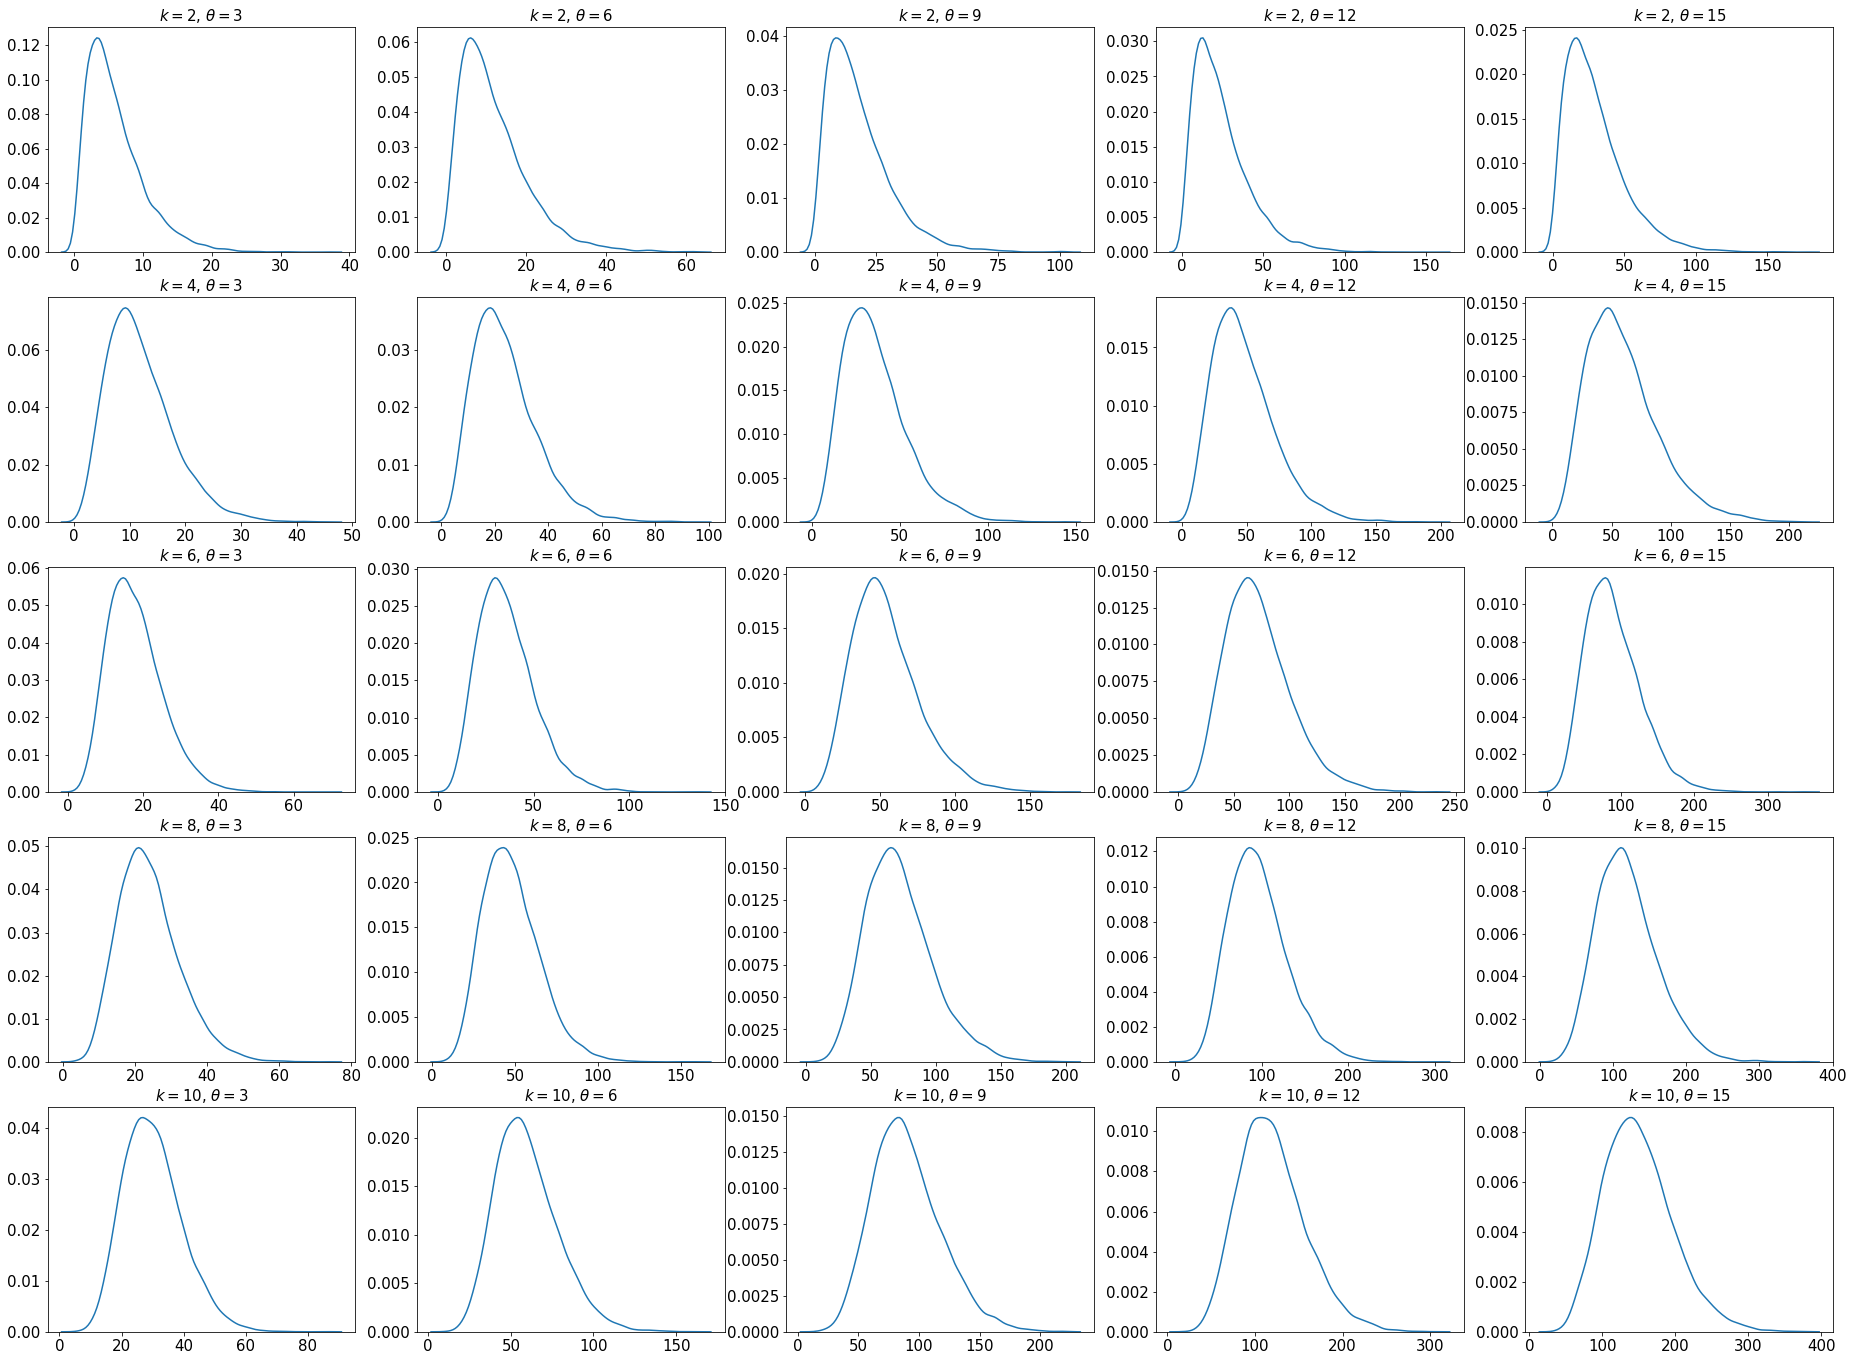

In [19]:
## Part 1: Experimenting with parameters

ks = [2 * i for i in range(1, 5 + 1)]
thetas = [3 * i for i in range(1, 5 + 1)]

nrows = 5
ncols = 5
fig, ax = plt.subplots(nrows, ncols, figsize=(fig_size[0] * ncols, fig_size[1] * nrows))
ax = np.reshape(ax, (nrows, ncols))

for i, j in product(range(nrows), range(ncols)):
    _ = sns.distplot(np.random.gamma(shape=ks[i], scale=thetas[j], size=int(1e4)), ax=ax[i, j], hist=False)
    _ = ax[i, j].set_title(fr"$k={ks[i]}$, $\theta={thetas[j]}$", fontsize=15)
    _ = ax[i, j].tick_params(labelsize=15)
    
plt.savefig("gamma.png")

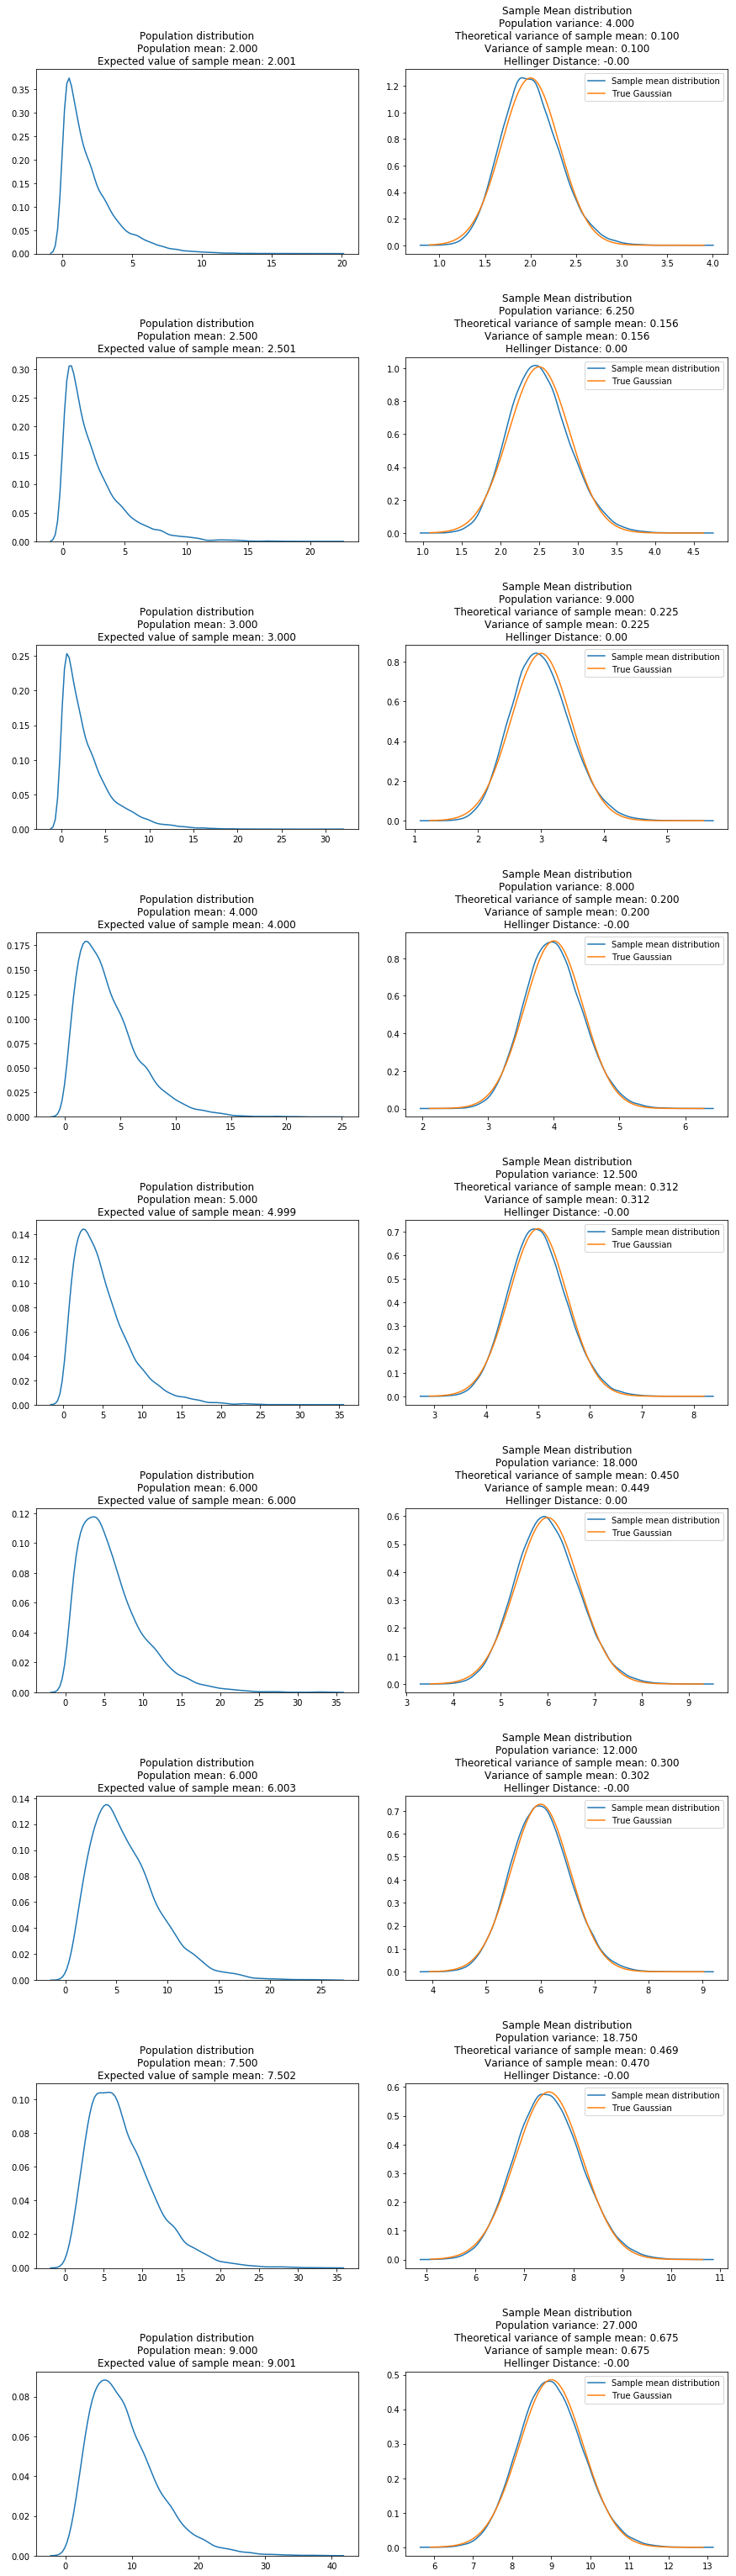

In [20]:
## Part 2: Central Limit Theorem

nrows = 9
ncols = 2
fig, ax = plt.subplots(nrows, ncols, figsize=(fig_size[0] * ncols, fig_size[1] * nrows))

count = 0
for k in [1, 2, 3]:
    for theta in [2, 2.5, 3]:
        # k = 2
        # theta = 2.5
        pop_mean = k * theta
        pop_var = k * (theta ** 2)
        SAMPLE_SIZE = 40
        RUNS = int(1e5)

        sample_means = [np.mean(np.random.gamma(shape=k, scale=theta, size=SAMPLE_SIZE)) for _ in range(RUNS)]

        expect_sample_mean = np.mean(sample_means)
        theo_var_sample_mean = pop_var / SAMPLE_SIZE
        var_sample_mean = np.var(sample_means)

        hellinger_distance = hellinger(pop_mean, expect_sample_mean, np.sqrt(theo_var_sample_mean), np.sqrt(var_sample_mean))

        _ = sns.distplot(np.random.gamma(shape=k, scale=theta, size=int(1e4)), ax=ax[count][0], hist=False)
        _ = ax[count][0].set(title=f"Population distribution\nPopulation mean: {pop_mean:.3f}\nExpected value of sample mean: {expect_sample_mean:.3f}")

        _ = sns.kdeplot(sample_means, ax=ax[count][1], label="Sample mean distribution")
        inputs = np.linspace(min(sample_means), max(sample_means), num=1000)
        _ = sns.lineplot(inputs, normal_pdf(inputs, pop_mean, np.sqrt(theo_var_sample_mean)), ax=ax[count][1], label="True Gaussian")
        _ = ax[count][1].set(title=f"Sample Mean distribution\nPopulation variance: {pop_var:.3f}\nTheoretical variance of sample mean: {theo_var_sample_mean:.3f}\nVariance of sample mean: {var_sample_mean:.3f}\nHellinger Distance: {hellinger_distance:.2f}")
        _ = ax[count][1].legend()

        count += 1
    
fig.tight_layout(pad=3.0)

## LogNormal Distribution
### Parameters
The LogNormal distribution has two parameters $\mu$ and $\sigma$.<br>
*If $Z \sim N(0, 1)$, then the random variable $X = e^{\mu+\sigma Z}$ follows the lognormal distribution.*

### PDF and other statistics:
1. PDF: $f_X(x; \mu, \sigma) = \frac{1}{x\sigma\sqrt{2\pi}}e^{-(\frac{(lnx - \mu)^2}{2\sigma^2})}; 0 \leq x \leq \infty$
2. Mean: $e^{\mu + \frac{\sigma^2}{2}}$
3. Variance: $(e^{\sigma^2} - 1)e^{2\mu + \sigma^2}$

### Occurences and Applications:
- The lognormal distribution, like the normal distribution, also is pretty common.
  - Human behaviours:
    - Length of comments in a discussion forum.
    - Length of a chess game
    - Dwell time on online articles.
  - Biology and medicine:
    - Measures of size of living tissue
    - Some physiological measurements, such as blood pressure
  - Colloidal and Polymer Chemistry:
    - Size of particles
    - Molar masses

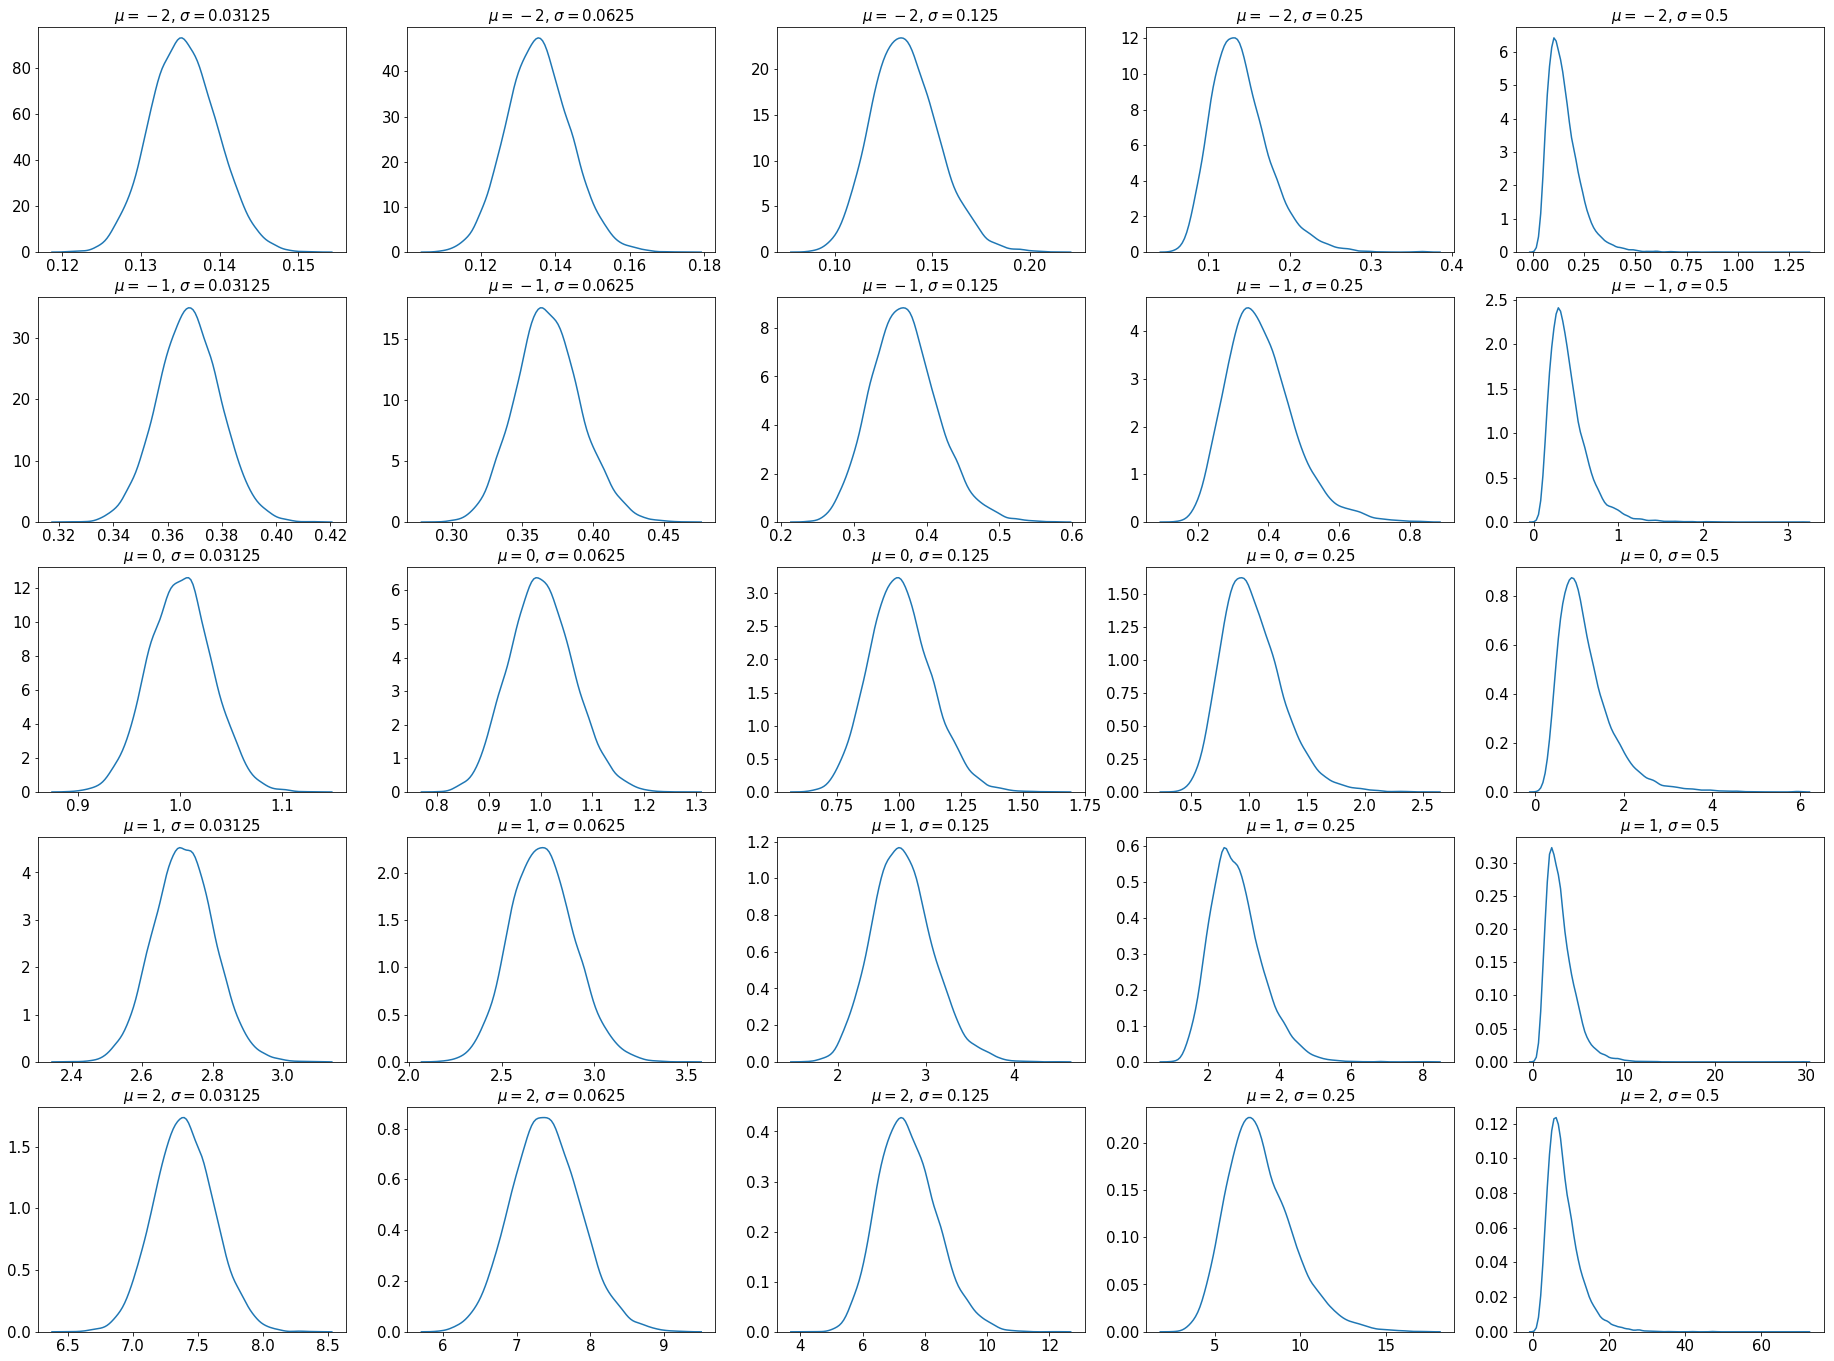

In [21]:
## Part 1: Experimenting with parameters

mus = [i - 2 for i in range(5)]
sigmas = sorted([0.5 ** (i + 1) for i in range(5)])

nrows = 5
ncols = 5
fig, ax = plt.subplots(nrows, ncols, figsize=(fig_size[0] * ncols, fig_size[1] * nrows))
ax = np.reshape(ax, (nrows, ncols))

for i, j in product(range(nrows), range(ncols)):
    _ = sns.distplot(np.random.lognormal(mean=mus[i], sigma=sigmas[j], size=int(1e4)), ax=ax[i, j], hist=False)
    _ = ax[i, j].set_title(fr"$\mu={mus[i]}$, $\sigma={sigmas[j]}$", fontsize=15)
    _ = ax[i, j].tick_params(labelsize=15)
    
plt.savefig("lognormal.png")

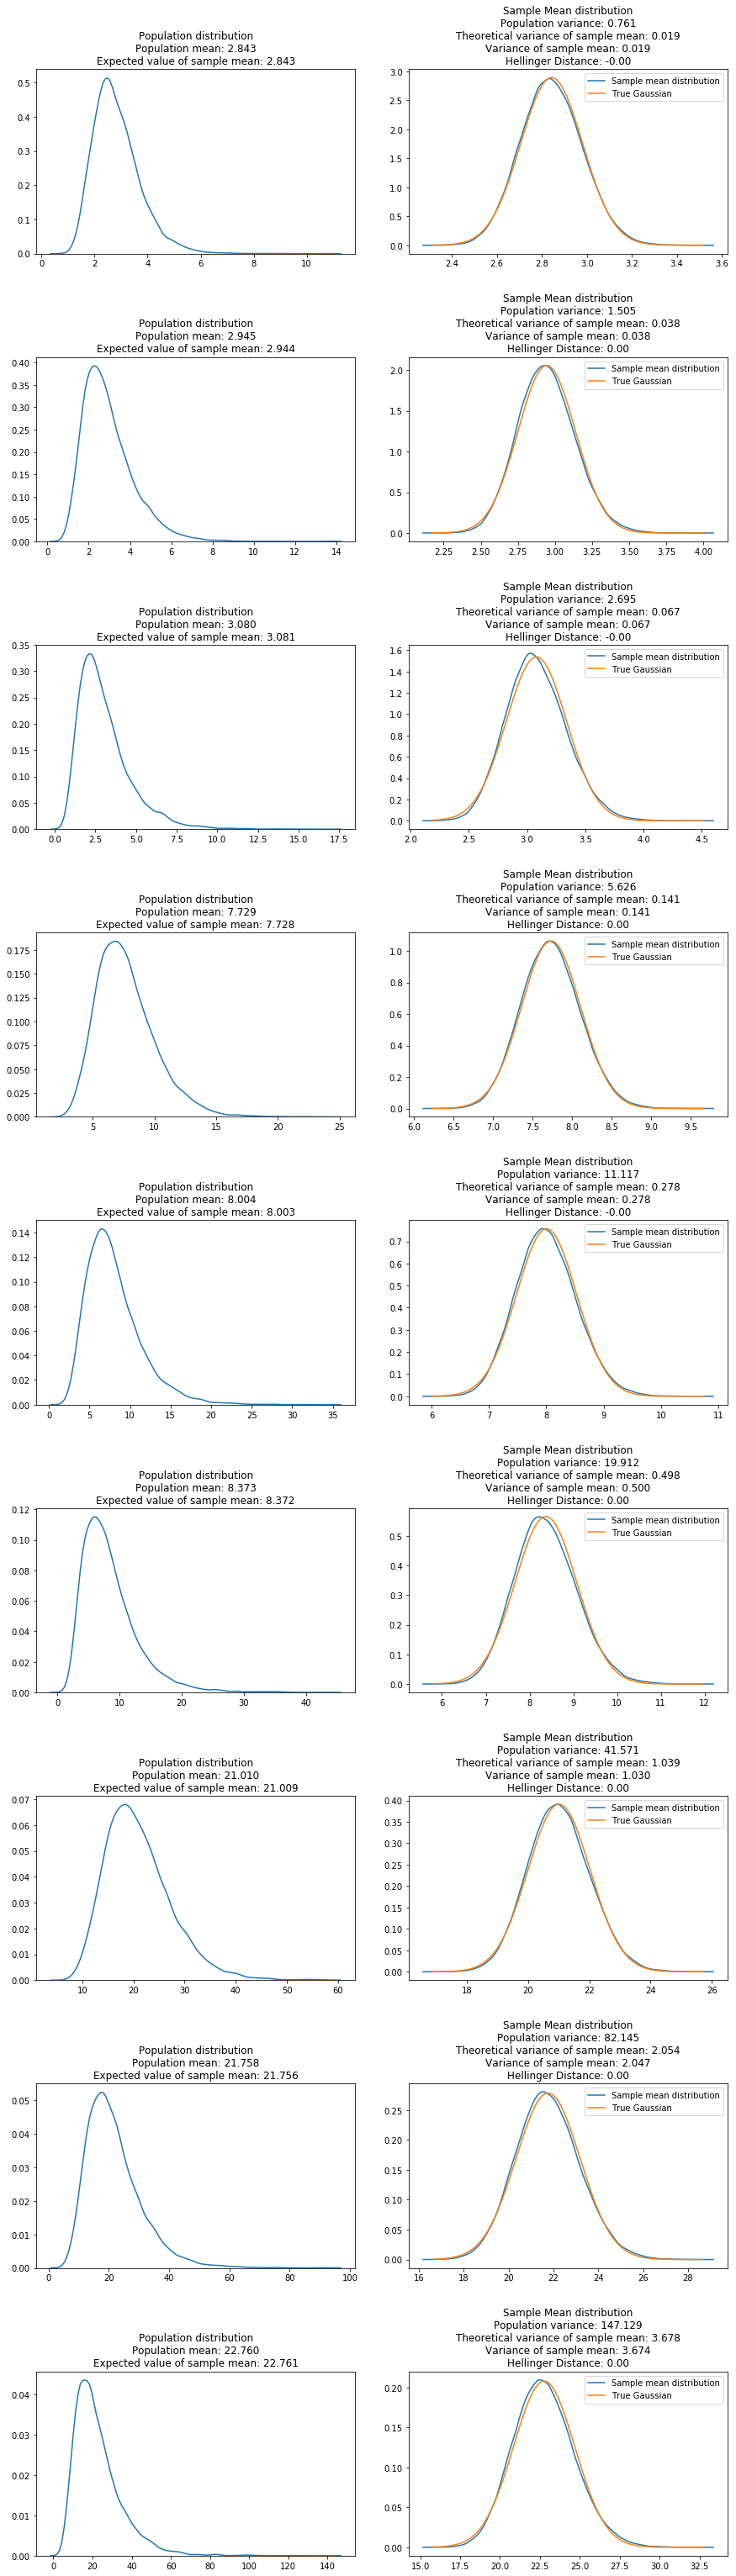

In [22]:
## Part 2: Central Limit Theorem

nrows = 9
ncols = 2
fig, ax = plt.subplots(nrows, ncols, figsize=(fig_size[0] * ncols, fig_size[1] * nrows))

count = 0
for mu in [1, 2, 3]:
    for sigma in [0.3, 0.4, 0.5]:
        # mu = 2
        # sigma = 0.5
        pop_mean = np.exp(mu + ((sigma ** 2) / 2))
        pop_var = (np.exp(sigma ** 2) - 1) * (np.exp((2 * mu) + (sigma ** 2)))
        SAMPLE_SIZE = 40
        RUNS = int(1e5)

        sample_means = [np.mean(np.random.lognormal(mean=mu, sigma=sigma, size=SAMPLE_SIZE)) for _ in range(RUNS)]

        expect_sample_mean = np.mean(sample_means)
        theo_var_sample_mean = pop_var / SAMPLE_SIZE
        var_sample_mean = np.var(sample_means)

        hellinger_distance = hellinger(pop_mean, expect_sample_mean, np.sqrt(theo_var_sample_mean), np.sqrt(var_sample_mean))

        _ = sns.distplot(np.random.lognormal(mean=mu, sigma=sigma, size=int(1e4)), ax=ax[count][0], hist=False)
        _ = ax[count][0].set(title=f"Population distribution\nPopulation mean: {pop_mean:.3f}\nExpected value of sample mean: {expect_sample_mean:.3f}")

        _ = sns.kdeplot(sample_means, ax=ax[count][1], label="Sample mean distribution")
        inputs = np.linspace(min(sample_means), max(sample_means), num=1000)
        _ = sns.lineplot(inputs, normal_pdf(inputs, pop_mean, np.sqrt(theo_var_sample_mean)), ax=ax[count][1], label="True Gaussian")
        _ = ax[count][1].set(title=f"Sample Mean distribution\nPopulation variance: {pop_var:.3f}\nTheoretical variance of sample mean: {theo_var_sample_mean:.3f}\nVariance of sample mean: {var_sample_mean:.3f}\nHellinger Distance: {hellinger_distance:.2f}")
        _ = ax[count][1].legend()

        count += 1
        
fig.tight_layout(pad=3.0)